#  Contains Code to compile results and generate graphs

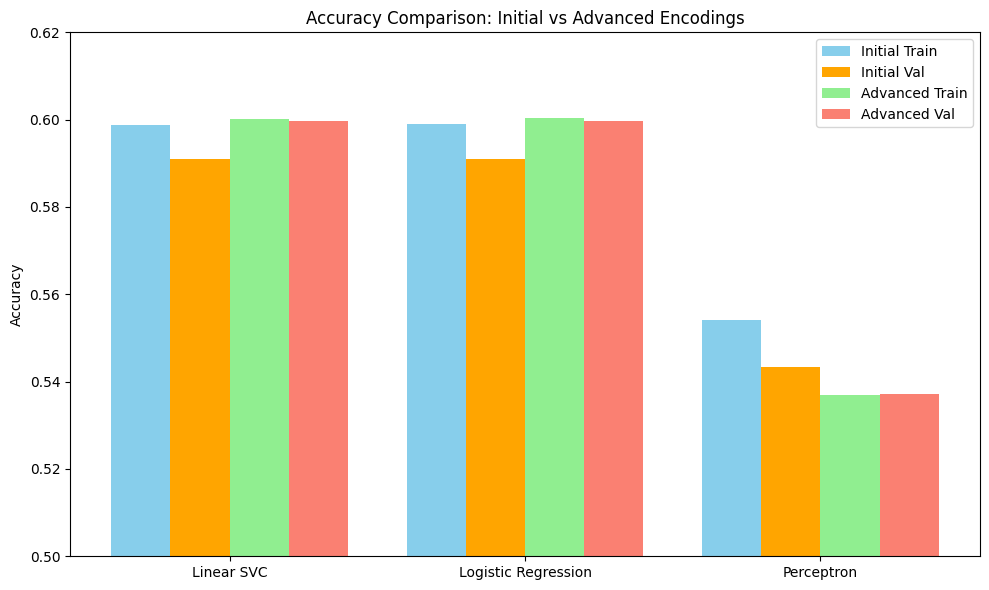

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy results

Initial_encodings = {
    "Linear SVC": {"train": 0.5988, "val": 0.5909},
    "Logistic Regression": {"train": 0.5989, "val": 0.5909},
    "Perceptron": {"train": 0.5542, "val": 0.5434}
}

advanced_encodings_model = {
    "Linear SVC": {"train": 0.6002, "val": 0.5998},
    "Logistic Regression": {"train": 0.6003, "val": 0.5998},
    "Perceptron": {"train": 0.5369, "val": 0.5371}
}

models = list(Initial_encodings.keys())
x = np.arange(len(models))
width = 0.2  # smaller width since we're plotting 4 bars per group

# Gather accuracy values
init_train = [Initial_encodings[m]["train"] for m in models]
init_val = [Initial_encodings[m]["val"] for m in models]
adv_train = [advanced_encodings_model[m]["train"] for m in models]
adv_val = [advanced_encodings_model[m]["val"] for m in models]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, init_train, width, label='Initial Train', color='skyblue')
plt.bar(x - 0.5*width, init_val, width, label='Initial Val', color='orange')
plt.bar(x + 0.5*width, adv_train, width, label='Advanced Train', color='lightgreen')
plt.bar(x + 1.5*width, adv_val, width, label='Advanced Val', color='salmon')

plt.ylabel('Accuracy')
plt.ylim(0.5, 0.62)
plt.title('Accuracy Comparison: Initial vs Advanced Encodings')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

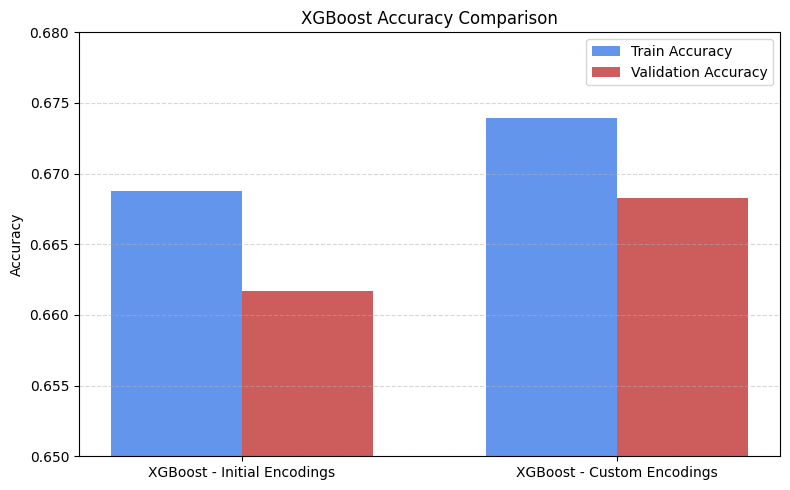

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values
xgb_initial_encodings_train_acc = 0.66876
xgb_initial_encodings_val_acc = 0.66171

xgb_custom_encodings_train_acc = 0.67391
xgb_custom_encodings_val_acc = 0.66830

# Data setup
models = ['XGBoost - Initial Encodings', 'XGBoost - Custom Encodings']
train_accuracies = [xgb_initial_encodings_train_acc, xgb_custom_encodings_train_acc]
val_accuracies = [xgb_initial_encodings_val_acc, xgb_custom_encodings_val_acc]

x = np.arange(len(models))
width = 0.35

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='cornflowerblue')
plt.bar(x + width/2, val_accuracies, width, label='Validation Accuracy', color='indianred')

# Formatting
plt.ylabel('Accuracy')
plt.ylim(0.65, 0.68)
plt.title('XGBoost Accuracy Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [3]:
import re
def extract_training_metrics(model_name, log_data):
    # Regular expression patterns to match the relevant lines
    train_loss_pattern = re.compile(r"Epoch \d+ Loss: (\d+\.\d+)")
    train_accuracy_pattern = re.compile(r"Train Accuracy: (\d+\.\d+)%")
    test_loss_pattern = re.compile(r"Test Loss: (\d+\.\d+)")
    test_accuracy_pattern = re.compile(r"Test Accuracy: (\d+\.\d+)%")

    # Extract values using the patterns
    train_losses = [float(loss) for loss in re.findall(train_loss_pattern, log_data)]
    train_accuracies = [float(acc) for acc in re.findall(train_accuracy_pattern, log_data)]
    test_losses = [float(loss) for loss in re.findall(test_loss_pattern, log_data)]
    test_accuracies = [float(acc) for acc in re.findall(test_accuracy_pattern, log_data)]

    # Print the arrays in the desired format
    print(f"{model_name}_train_losses = {train_losses}")
    print(f"{model_name}_train_accuracies = {train_accuracies}")
    print(f"{model_name}_test_losses = {test_losses}")
    print(f"{model_name}_test_accuracies = {test_accuracies}")

    return train_losses, train_accuracies, test_losses, test_accuracies


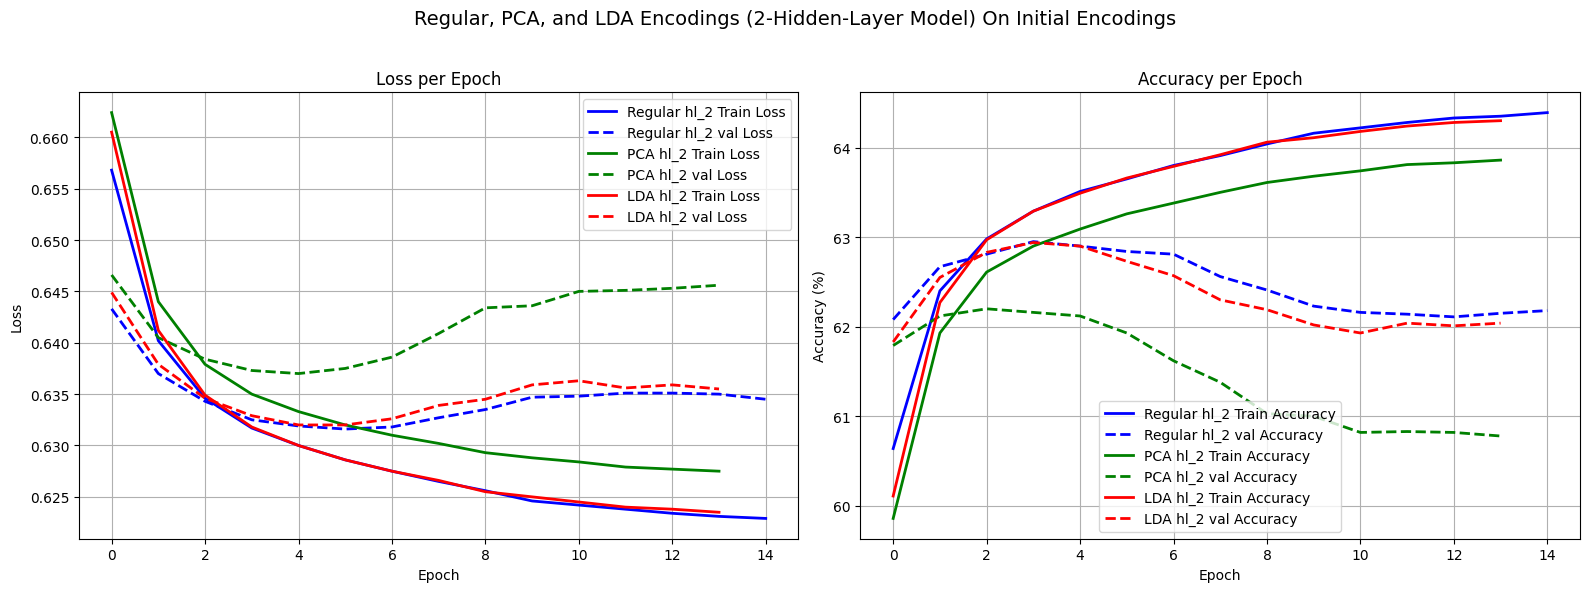

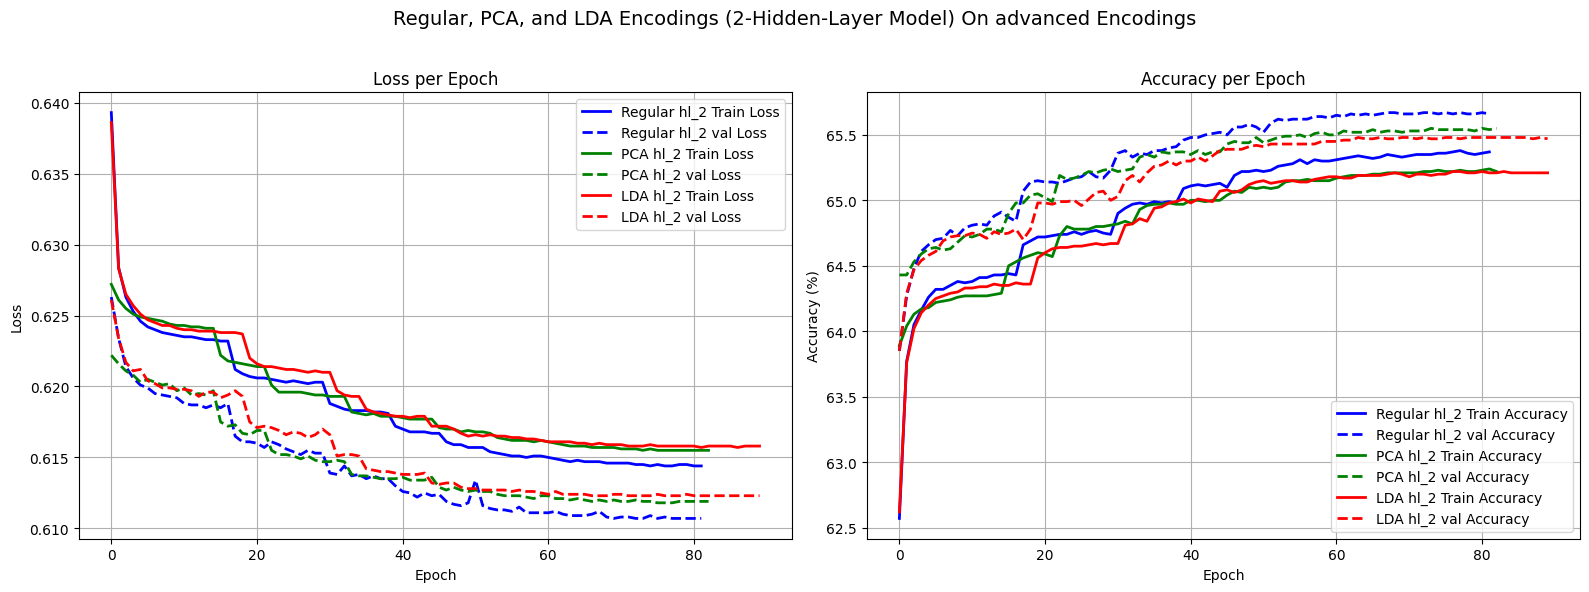

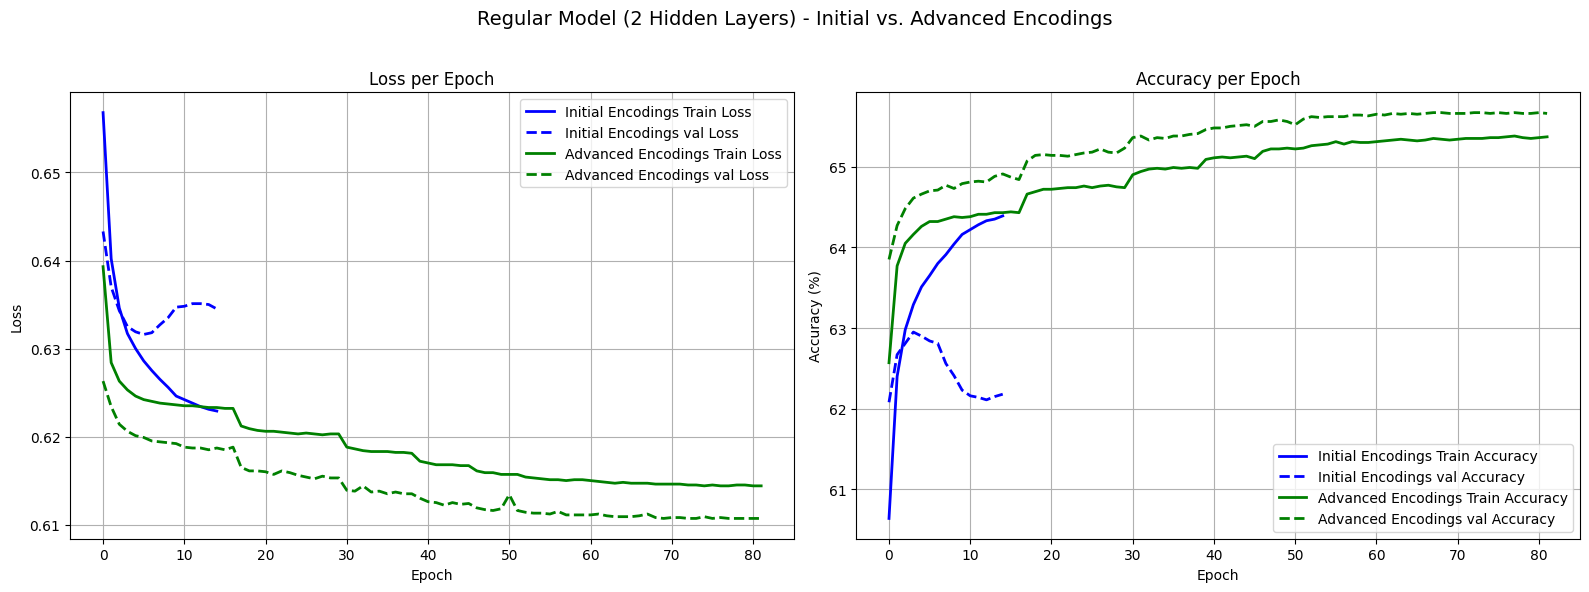

In [4]:
import matplotlib.pyplot as plt

# Regular hl_2 (2-hidden-layer model on entire dataset)
hl_2_train_losses_initial_encodings = [0.6568, 0.6402, 0.6346, 0.6317, 0.63, 0.6286, 0.6275, 0.6265, 0.6256, 0.6246, 0.6242, 0.6238, 0.6234, 0.6231, 0.6229]
hl_2_train_accuracies_initial_encodings = [60.64, 62.4, 62.98, 63.29, 63.51, 63.65, 63.8, 63.91, 64.04, 64.16, 64.22, 64.28, 64.33, 64.35, 64.39]
hl_2_val_losses_initial_encodings = [0.6433, 0.637, 0.6343, 0.6325, 0.6319, 0.6316, 0.6318, 0.6327, 0.6335, 0.6347, 0.6348, 0.6351, 0.6351, 0.635, 0.6345]
hl_2_val_accuracies_initial_encodings = [62.08, 62.67, 62.81, 62.95, 62.9, 62.84, 62.81, 62.56, 62.41, 62.23, 62.16, 62.14, 62.11, 62.15, 62.18]

# pca_hl_2 (2-hidden-layer model on PCA-reduced data)
pca_hl_2_train_losses_initial_encodings = [0.6624, 0.644, 0.6379, 0.635, 0.6333, 0.632, 0.631, 0.6302, 0.6293, 0.6288, 0.6284, 0.6279, 0.6277, 0.6275]
pca_hl_2_train_accuracies_initial_encodings = [59.86, 61.93, 62.61, 62.9, 63.09, 63.26, 63.38, 63.5, 63.61, 63.68, 63.74, 63.81, 63.83, 63.86]
pca_hl_2_val_losses_initial_encodings = [0.6466, 0.6405, 0.6384, 0.6373, 0.637, 0.6375, 0.6386, 0.6409, 0.6434, 0.6436, 0.645, 0.6451, 0.6453, 0.6456]
pca_hl_2_val_accuracies_initial_encodings = [61.79, 62.12, 62.2, 62.16, 62.12, 61.93, 61.62, 61.38, 61.03, 61.0, 60.82, 60.83, 60.82, 60.78]

# lda_hl_2 (2-hidden-layer model on LDA-reduced data)
lda_hl_2_train_losses_initial_encodings = [0.6605, 0.6412, 0.6349, 0.6318, 0.63, 0.6286, 0.6275, 0.6266, 0.6255, 0.625, 0.6245, 0.624, 0.6238, 0.6235]
lda_hl_2_train_accuracies_initial_encodings = [60.11, 62.27, 62.97, 63.29, 63.49, 63.66, 63.79, 63.92, 64.06, 64.11, 64.18, 64.24, 64.28, 64.3]
lda_hl_2_val_losses_initial_encodings = [0.6449, 0.6379, 0.6346, 0.6329, 0.632, 0.632, 0.6326, 0.6339, 0.6345, 0.6359, 0.6363, 0.6356, 0.6359, 0.6355]
lda_hl_2_val_accuracies_initial_encodings = [61.83, 62.55, 62.83, 62.94, 62.9, 62.73, 62.57, 62.3, 62.19, 62.02, 61.93, 62.04, 62.01, 62.04]

import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Loss on ax1
ax1.plot(hl_2_train_losses_initial_encodings, label='Regular hl_2 Train Loss', color='b', linestyle='-', linewidth=2)
ax1.plot(hl_2_val_losses_initial_encodings, label='Regular hl_2 val Loss', color='b', linestyle='--', linewidth=2)

ax1.plot(pca_hl_2_train_losses_initial_encodings, label='PCA hl_2 Train Loss', color='g', linestyle='-', linewidth=2)
ax1.plot(pca_hl_2_val_losses_initial_encodings, label='PCA hl_2 val Loss', color='g', linestyle='--', linewidth=2)

ax1.plot(lda_hl_2_train_losses_initial_encodings, label='LDA hl_2 Train Loss', color='r', linestyle='-', linewidth=2)
ax1.plot(lda_hl_2_val_losses_initial_encodings, label='LDA hl_2 val Loss', color='r', linestyle='--', linewidth=2)

ax1.set_title('Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

# Plotting Accuracy on ax2
ax2.plot(hl_2_train_accuracies_initial_encodings, label='Regular hl_2 Train Accuracy', color='b', linestyle='-', linewidth=2)
ax2.plot(hl_2_val_accuracies_initial_encodings, label='Regular hl_2 val Accuracy', color='b', linestyle='--', linewidth=2)

ax2.plot(pca_hl_2_train_accuracies_initial_encodings, label='PCA hl_2 Train Accuracy', color='g', linestyle='-', linewidth=2)
ax2.plot(pca_hl_2_val_accuracies_initial_encodings, label='PCA hl_2 val Accuracy', color='g', linestyle='--', linewidth=2)

ax2.plot(lda_hl_2_train_accuracies_initial_encodings, label='LDA hl_2 Train Accuracy', color='r', linestyle='-', linewidth=2)
ax2.plot(lda_hl_2_val_accuracies_initial_encodings, label='LDA hl_2 val Accuracy', color='r', linestyle='--', linewidth=2)

ax2.set_title('Accuracy per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.grid(True)
ax2.legend()

plt.suptitle('Regular, PCA, and LDA Encodings (2-Hidden-Layer Model) On Initial Encodings', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

hl_2_train_losses_advanced_encodings = [0.6393, 0.6284, 0.6263, 0.6253, 0.6246, 0.6242, 0.624, 0.6238, 0.6237, 0.6236, 0.6235, 0.6235, 0.6234, 0.6233, 0.6233, 0.6232, 0.6232, 0.6212, 0.6209, 0.6207, 0.6206, 0.6206, 0.6205, 0.6204, 0.6203, 0.6204, 0.6203, 0.6202, 0.6203, 0.6203, 0.6188, 0.6186, 0.6184, 0.6183, 0.6183, 0.6183, 0.6182, 0.6182, 0.6181, 0.6172, 0.617, 0.6168, 0.6168, 0.6168, 0.6167, 0.6167, 0.6161, 0.6159, 0.6159, 0.6157, 0.6157, 0.6157, 0.6154, 0.6153, 0.6152, 0.6151, 0.6151, 0.615, 0.6151, 0.6151, 0.615, 0.6149, 0.6148, 0.6147, 0.6148, 0.6147, 0.6147, 0.6147, 0.6146, 0.6146, 0.6146, 0.6146, 0.6145, 0.6145, 0.6144, 0.6145, 0.6144, 0.6144, 0.6145, 0.6145, 0.6144, 0.6144]
hl_2_train_accuracies_advanced_encodings = [62.57, 63.77, 64.05, 64.16, 64.26, 64.32, 64.32, 64.35, 64.38, 64.37, 64.38, 64.41, 64.41, 64.43, 64.43, 64.44, 64.43, 64.66, 64.69, 64.72, 64.72, 64.73, 64.74, 64.74, 64.76, 64.74, 64.76, 64.77, 64.75, 64.74, 64.9, 64.94, 64.97, 64.98, 64.97, 64.99, 64.98, 64.99, 64.98, 65.09, 65.11, 65.12, 65.11, 65.12, 65.13, 65.1, 65.19, 65.22, 65.22, 65.23, 65.22, 65.23, 65.26, 65.27, 65.28, 65.31, 65.28, 65.31, 65.3, 65.3, 65.31, 65.32, 65.33, 65.34, 65.33, 65.32, 65.33, 65.35, 65.34, 65.33, 65.34, 65.35, 65.35, 65.35, 65.36, 65.36, 65.37, 65.38, 65.36, 65.35, 65.36, 65.37]
hl_2_val_losses_advanced_encodings = [0.6263, 0.6234, 0.6214, 0.6206, 0.6201, 0.6199, 0.6195, 0.6194, 0.6193, 0.6192, 0.6188, 0.6187, 0.6187, 0.6185, 0.6187, 0.6185, 0.6188, 0.6165, 0.6161, 0.6161, 0.616, 0.6157, 0.6161, 0.6159, 0.6156, 0.6154, 0.6152, 0.6155, 0.6153, 0.6153, 0.6139, 0.6138, 0.6144, 0.6137, 0.6138, 0.6135, 0.6137, 0.6135, 0.6135, 0.613, 0.6126, 0.6125, 0.6122, 0.6125, 0.6123, 0.6124, 0.6119, 0.6117, 0.6116, 0.6118, 0.6134, 0.6116, 0.6114, 0.6113, 0.6113, 0.6112, 0.6115, 0.6111, 0.6111, 0.6111, 0.6111, 0.6112, 0.611, 0.6109, 0.6109, 0.6109, 0.611, 0.6112, 0.6108, 0.6107, 0.6108, 0.6108, 0.6107, 0.6107, 0.6109, 0.6107, 0.6108, 0.6107, 0.6107, 0.6107, 0.6107, 0.6107]
hl_2_val_accuracies_advanced_encodings = [63.85, 64.27, 64.48, 64.61, 64.66, 64.7, 64.71, 64.77, 64.73, 64.79, 64.81, 64.82, 64.81, 64.88, 64.91, 64.87, 64.84, 65.07, 65.14, 65.15, 65.14, 65.14, 65.13, 65.15, 65.17, 65.18, 65.22, 65.18, 65.17, 65.23, 65.36, 65.38, 65.33, 65.36, 65.35, 65.38, 65.38, 65.4, 65.41, 65.46, 65.48, 65.48, 65.5, 65.51, 65.52, 65.5, 65.56, 65.56, 65.58, 65.56, 65.52, 65.59, 65.62, 65.61, 65.62, 65.62, 65.62, 65.64, 65.64, 65.63, 65.65, 65.64, 65.66, 65.65, 65.66, 65.65, 65.66, 65.67, 65.67, 65.66, 65.66, 65.66, 65.67, 65.67, 65.66, 65.67, 65.66, 65.67, 65.66, 65.66, 65.67, 65.66]
pca_hl_2_train_losses_advanced_encodings = [0.6272, 0.6261, 0.6255, 0.6251, 0.6249, 0.6248, 0.6247, 0.6246, 0.6244, 0.6243, 0.6243, 0.6242, 0.6242, 0.6241, 0.6241, 0.6222, 0.6218, 0.6217, 0.6216, 0.6215, 0.6214, 0.6214, 0.6201, 0.6196, 0.6196, 0.6196, 0.6196, 0.6195, 0.6194, 0.6194, 0.6193, 0.6193, 0.6193, 0.6182, 0.6181, 0.618, 0.6181, 0.6179, 0.6179, 0.6179, 0.6178, 0.6177, 0.6177, 0.6177, 0.6177, 0.6171, 0.617, 0.617, 0.6168, 0.6169, 0.6168, 0.6168, 0.6167, 0.6164, 0.6163, 0.6162, 0.6162, 0.6162, 0.6161, 0.6162, 0.6161, 0.616, 0.6159, 0.6158, 0.6158, 0.6158, 0.6157, 0.6157, 0.6157, 0.6157, 0.6156, 0.6156, 0.6156, 0.6155, 0.6156, 0.6155, 0.6155, 0.6155, 0.6155, 0.6155, 0.6155, 0.6155, 0.6155]
pca_hl_2_train_accuracies_advanced_encodings = [63.89, 64.04, 64.13, 64.17, 64.18, 64.22, 64.23, 64.24, 64.26, 64.27, 64.27, 64.27, 64.27, 64.28, 64.29, 64.5, 64.53, 64.56, 64.58, 64.6, 64.59, 64.57, 64.73, 64.8, 64.78, 64.78, 64.78, 64.8, 64.8, 64.81, 64.82, 64.84, 64.82, 64.93, 64.96, 64.97, 64.97, 64.98, 64.97, 64.97, 65.0, 65.0, 64.99, 65.0, 65.0, 65.04, 65.07, 65.06, 65.1, 65.09, 65.1, 65.09, 65.1, 65.14, 65.15, 65.15, 65.16, 65.15, 65.15, 65.15, 65.17, 65.18, 65.19, 65.19, 65.19, 65.2, 65.2, 65.21, 65.21, 65.21, 65.21, 65.21, 65.22, 65.22, 65.23, 65.22, 65.22, 65.23, 65.22, 65.22, 65.23, 65.24, 65.22]
pca_hl_2_val_losses_advanced_encodings = [0.6222, 0.6216, 0.6211, 0.6208, 0.6203, 0.6205, 0.6203, 0.6201, 0.6202, 0.6197, 0.6199, 0.6194, 0.6195, 0.6194, 0.6197, 0.6175, 0.6172, 0.6173, 0.6167, 0.6166, 0.6169, 0.6169, 0.6155, 0.6152, 0.6152, 0.6151, 0.6149, 0.6151, 0.6148, 0.6147, 0.6147, 0.6148, 0.6147, 0.6138, 0.6137, 0.6137, 0.6136, 0.6135, 0.6135, 0.6135, 0.6136, 0.6134, 0.6134, 0.6134, 0.6136, 0.6129, 0.6127, 0.6129, 0.6127, 0.6126, 0.6127, 0.6126, 0.6126, 0.6124, 0.6123, 0.6123, 0.6123, 0.6122, 0.6121, 0.6123, 0.6123, 0.6121, 0.6121, 0.612, 0.6121, 0.612, 0.6119, 0.612, 0.6119, 0.612, 0.6119, 0.6119, 0.612, 0.6119, 0.6119, 0.6118, 0.6118, 0.6118, 0.6119, 0.6119, 0.6119, 0.6119, 0.6119]
pca_hl_2_val_accuracies_advanced_encodings = [64.43, 64.43, 64.53, 64.59, 64.63, 64.64, 64.62, 64.63, 64.68, 64.73, 64.72, 64.74, 64.78, 64.78, 64.76, 64.9, 64.98, 64.98, 65.04, 65.05, 65.02, 64.99, 65.19, 65.16, 65.17, 65.19, 65.22, 65.21, 65.23, 65.24, 65.22, 65.23, 65.24, 65.33, 65.35, 65.33, 65.37, 65.36, 65.37, 65.37, 65.35, 65.38, 65.35, 65.37, 65.37, 65.43, 65.45, 65.44, 65.44, 65.48, 65.44, 65.46, 65.48, 65.49, 65.49, 65.5, 65.48, 65.51, 65.52, 65.5, 65.5, 65.53, 65.52, 65.52, 65.52, 65.54, 65.52, 65.53, 65.53, 65.52, 65.53, 65.53, 65.53, 65.55, 65.54, 65.54, 65.54, 65.54, 65.54, 65.53, 65.55, 65.54, 65.55]

lda_hl_2_train_losses_advanced_encodings = [0.6386, 0.6283, 0.6265, 0.6257, 0.6251, 0.6247, 0.6245, 0.6243, 0.6243, 0.6241, 0.624, 0.624, 0.6239, 0.6239, 0.6239, 0.6238, 0.6238, 0.6238, 0.6237, 0.622, 0.6216, 0.6214, 0.6214, 0.6213, 0.6212, 0.6212, 0.6211, 0.621, 0.6211, 0.621, 0.621, 0.6197, 0.6194, 0.6193, 0.6193, 0.6184, 0.6182, 0.6181, 0.618, 0.6179, 0.6179, 0.6178, 0.6179, 0.6179, 0.6172, 0.6172, 0.6172, 0.617, 0.6167, 0.6165, 0.6166, 0.6165, 0.6166, 0.6165, 0.6165, 0.6164, 0.6164, 0.6163, 0.6163, 0.6162, 0.6161, 0.6161, 0.6161, 0.6161, 0.616, 0.616, 0.6159, 0.616, 0.6159, 0.6159, 0.6159, 0.6158, 0.6158, 0.6158, 0.6159, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6157, 0.6158, 0.6158, 0.6158, 0.6158, 0.6157, 0.6158, 0.6158, 0.6158]
lda_hl_2_train_accuracies_advanced_encodings = [62.62, 63.76, 64.02, 64.14, 64.2, 64.25, 64.27, 64.29, 64.3, 64.33, 64.33, 64.34, 64.34, 64.36, 64.35, 64.35, 64.37, 64.36, 64.36, 64.56, 64.6, 64.63, 64.64, 64.64, 64.65, 64.65, 64.66, 64.67, 64.66, 64.67, 64.67, 64.81, 64.82, 64.86, 64.84, 64.94, 64.95, 64.98, 64.99, 65.01, 64.98, 65.01, 65.0, 64.99, 65.07, 65.08, 65.06, 65.08, 65.12, 65.14, 65.15, 65.13, 65.14, 65.15, 65.15, 65.14, 65.14, 65.16, 65.17, 65.18, 65.18, 65.17, 65.17, 65.19, 65.19, 65.19, 65.19, 65.2, 65.21, 65.2, 65.18, 65.2, 65.2, 65.19, 65.2, 65.2, 65.22, 65.22, 65.21, 65.21, 65.22, 65.21, 65.21, 65.22, 65.21, 65.21, 65.21, 65.21, 65.21, 65.21]
lda_hl_2_val_losses_advanced_encodings = [0.6261, 0.6234, 0.6217, 0.6211, 0.6212, 0.6204, 0.6202, 0.6199, 0.6199, 0.6198, 0.6198, 0.6197, 0.6193, 0.6196, 0.6196, 0.6192, 0.6194, 0.6197, 0.6193, 0.6175, 0.6171, 0.6172, 0.6171, 0.6169, 0.6166, 0.6168, 0.6167, 0.6164, 0.6166, 0.617, 0.6166, 0.6151, 0.6152, 0.6152, 0.6151, 0.6142, 0.6141, 0.614, 0.614, 0.6139, 0.6138, 0.6138, 0.6138, 0.6139, 0.6132, 0.6131, 0.6132, 0.6132, 0.6129, 0.6128, 0.6128, 0.6127, 0.6127, 0.6127, 0.6127, 0.6126, 0.6127, 0.6126, 0.6126, 0.6125, 0.6124, 0.6126, 0.6124, 0.6124, 0.6124, 0.6124, 0.6123, 0.6123, 0.6123, 0.6124, 0.6124, 0.6123, 0.6123, 0.6123, 0.6123, 0.6124, 0.6123, 0.6123, 0.6123, 0.6124, 0.6123, 0.6123, 0.6123, 0.6123, 0.6123, 0.6123, 0.6123, 0.6123, 0.6123, 0.6123]
lda_hl_2_val_accuracies_advanced_encodings = [63.85, 64.29, 64.47, 64.54, 64.58, 64.61, 64.69, 64.72, 64.73, 64.73, 64.75, 64.74, 64.71, 64.76, 64.74, 64.75, 64.78, 64.7, 64.78, 64.98, 64.98, 64.97, 64.99, 64.99, 65.0, 64.96, 65.01, 65.06, 65.07, 65.0, 65.03, 65.15, 65.19, 65.14, 65.21, 65.26, 65.27, 65.3, 65.27, 65.3, 65.3, 65.33, 65.3, 65.34, 65.38, 65.39, 65.39, 65.39, 65.41, 65.42, 65.41, 65.43, 65.43, 65.43, 65.43, 65.43, 65.43, 65.43, 65.45, 65.45, 65.45, 65.46, 65.46, 65.48, 65.47, 65.47, 65.48, 65.47, 65.47, 65.48, 65.48, 65.47, 65.48, 65.47, 65.47, 65.48, 65.48, 65.47, 65.48, 65.48, 65.48, 65.48, 65.48, 65.48, 65.48, 65.48, 65.48, 65.47, 65.48, 65.47]


import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Loss on ax1
ax1.plot(hl_2_train_losses_advanced_encodings, label='Regular hl_2 Train Loss', color='b', linestyle='-', linewidth=2)
ax1.plot(hl_2_val_losses_advanced_encodings, label='Regular hl_2 val Loss', color='b', linestyle='--', linewidth=2)

ax1.plot(pca_hl_2_train_losses_advanced_encodings, label='PCA hl_2 Train Loss', color='g', linestyle='-', linewidth=2)
ax1.plot(pca_hl_2_val_losses_advanced_encodings, label='PCA hl_2 val Loss', color='g', linestyle='--', linewidth=2)

ax1.plot(lda_hl_2_train_losses_advanced_encodings, label='LDA hl_2 Train Loss', color='r', linestyle='-', linewidth=2)
ax1.plot(lda_hl_2_val_losses_advanced_encodings, label='LDA hl_2 val Loss', color='r', linestyle='--', linewidth=2)

ax1.set_title('Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

# Plotting Accuracy on ax2
ax2.plot(hl_2_train_accuracies_advanced_encodings, label='Regular hl_2 Train Accuracy', color='b', linestyle='-', linewidth=2)
ax2.plot(hl_2_val_accuracies_advanced_encodings, label='Regular hl_2 val Accuracy', color='b', linestyle='--', linewidth=2)

ax2.plot(pca_hl_2_train_accuracies_advanced_encodings, label='PCA hl_2 Train Accuracy', color='g', linestyle='-', linewidth=2)
ax2.plot(pca_hl_2_val_accuracies_advanced_encodings, label='PCA hl_2 val Accuracy', color='g', linestyle='--', linewidth=2)

ax2.plot(lda_hl_2_train_accuracies_advanced_encodings, label='LDA hl_2 Train Accuracy', color='r', linestyle='-', linewidth=2)
ax2.plot(lda_hl_2_val_accuracies_advanced_encodings, label='LDA hl_2 val Accuracy', color='r', linestyle='--', linewidth=2)

ax2.set_title('Accuracy per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.grid(True)
ax2.legend()

plt.suptitle('Regular, PCA, and LDA Encodings (2-Hidden-Layer Model) On advanced Encodings', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Loss on ax1
ax1.plot(hl_2_train_losses_initial_encodings, label='Initial Encodings Train Loss', color='b', linestyle='-', linewidth=2)
ax1.plot(hl_2_val_losses_initial_encodings, label='Initial Encodings val Loss', color='b', linestyle='--', linewidth=2)

ax1.plot(hl_2_train_losses_advanced_encodings, label='Advanced Encodings Train Loss', color='g', linestyle='-', linewidth=2)
ax1.plot(hl_2_val_losses_advanced_encodings, label='Advanced Encodings val Loss', color='g', linestyle='--', linewidth=2)

ax1.set_title('Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

# Plotting Accuracy on ax2
ax2.plot(hl_2_train_accuracies_initial_encodings, label='Initial Encodings Train Accuracy', color='b', linestyle='-', linewidth=2)
ax2.plot(hl_2_val_accuracies_initial_encodings, label='Initial Encodings val Accuracy', color='b', linestyle='--', linewidth=2)

ax2.plot(hl_2_train_accuracies_advanced_encodings, label='Advanced Encodings Train Accuracy', color='g', linestyle='-', linewidth=2)
ax2.plot(hl_2_val_accuracies_advanced_encodings, label='Advanced Encodings val Accuracy', color='g', linestyle='--', linewidth=2)

ax2.set_title('Accuracy per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.grid(True)
ax2.legend()

plt.suptitle('Regular Model (2 Hidden Layers) - Initial vs. Advanced Encodings', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [5]:
hl_3_initial_encodings_logs='''
Epoch 1/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:04<00:00,  8.20it/s, acc=61.39%, loss=0.6471]
Epoch 1 Loss: 0.6617, Train Accuracy: 60.23%
Test Loss: 0.6410, Test Accuracy: 62.35%
Epoch 2/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:06<00:00,  8.17it/s, acc=64.31%, loss=0.6173]
Epoch 2 Loss: 0.6375, Train Accuracy: 62.76%
Test Loss: 0.6353, Test Accuracy: 62.67%
Epoch 3/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:13<00:00,  8.05it/s, acc=62.42%, loss=0.6388]
Epoch 3 Loss: 0.6318, Train Accuracy: 63.35%
Test Loss: 0.6336, Test Accuracy: 62.69%
Epoch 4/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:13<00:00,  8.04it/s, acc=63.95%, loss=0.6136]
Epoch 4 Loss: 0.6287, Train Accuracy: 63.65%
Test Loss: 0.6328, Test Accuracy: 62.76%
Epoch 5/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:12<00:00,  8.05it/s, acc=64.00%, loss=0.6191]
Epoch 5 Loss: 0.6268, Train Accuracy: 63.89%
Test Loss: 0.6341, Test Accuracy: 62.43%
Epoch 6/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:17<00:00,  7.97it/s, acc=63.95%, loss=0.6200]
Epoch 6 Loss: 0.6252, Train Accuracy: 64.05%
Test Loss: 0.6391, Test Accuracy: 61.79%
Epoch 7/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:17<00:00,  7.96it/s, acc=66.67%, loss=0.6172]
Epoch 7 Loss: 0.6239, Train Accuracy: 64.24%
Test Loss: 0.6454, Test Accuracy: 61.07%
Learning rate changed from 0.000100 to 0.000050
Epoch 8/100 - LR: 0.000050: 100%|███████████████████| 3485/3485 [07:18<00:00,  7.95it/s, acc=64.11%, loss=0.6221]
Epoch 8 Loss: 0.6225, Train Accuracy: 64.42%
Test Loss: 0.6483, Test Accuracy: 60.76%
Epoch 9/100 - LR: 0.000050: 100%|███████████████████| 3485/3485 [07:17<00:00,  7.97it/s, acc=65.08%, loss=0.6132]
Epoch 9 Loss: 0.6216, Train Accuracy: 64.51%
Test Loss: 0.6490, Test Accuracy: 60.75%
Epoch 10/100 - LR: 0.000050: 100%|██████████████████| 3485/3485 [07:15<00:00,  8.01it/s, acc=64.21%, loss=0.6256]
Epoch 10 Loss: 0.6211, Train Accuracy: 64.58%
Test Loss: 0.6460, Test Accuracy: 60.97%
Learning rate changed from 0.000050 to 0.000025
Epoch 11/100 - LR: 0.000025: 100%|██████████████████| 3485/3485 [07:22<00:00,  7.87it/s, acc=64.36%, loss=0.6215]
Epoch 11 Loss: 0.6203, Train Accuracy: 64.64%
Test Loss: 0.6469, Test Accuracy: 60.98%
Epoch 12/100 - LR: 0.000025: 100%|██████████████████| 3485/3485 [07:20<00:00,  7.91it/s, acc=66.77%, loss=0.6098]
Epoch 12 Loss: 0.6200, Train Accuracy: 64.69%
Test Loss: 0.6460, Test Accuracy: 61.08%
Epoch 13/100 - LR: 0.000025: 100%|██████████████████| 3485/3485 [07:20<00:00,  7.91it/s, acc=64.93%, loss=0.6041]
Epoch 13 Loss: 0.6197, Train Accuracy: 64.72%
Test Loss: 0.6467, Test Accuracy: 61.06%
Learning rate changed from 0.000025 to 0.000013
Early stopping triggered at epoch 13. Best model was from epoch 4.
'''

In [6]:
pca_hl_3_initial_encodings_logs = '''
Epoch 1/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:08<00:00,  8.14it/s, acc=62.26%, loss=0.6496]
Epoch 1 Loss: 0.6610, Train Accuracy: 60.20%
Test Loss: 0.6429, Test Accuracy: 61.99%
Epoch 2/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:11<00:00,  8.07it/s, acc=64.41%, loss=0.6297]
Epoch 2 Loss: 0.6394, Train Accuracy: 62.54%
Test Loss: 0.6385, Test Accuracy: 62.30%
Epoch 3/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:11<00:00,  8.08it/s, acc=62.37%, loss=0.6399]
Epoch 3 Loss: 0.6347, Train Accuracy: 63.01%
Test Loss: 0.6376, Test Accuracy: 62.15%
Epoch 4/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:12<00:00,  8.06it/s, acc=63.03%, loss=0.6368]
Epoch 4 Loss: 0.6321, Train Accuracy: 63.28%
Test Loss: 0.6391, Test Accuracy: 61.92%
Epoch 5/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:14<00:00,  8.01it/s, acc=63.49%, loss=0.6314]
Epoch 5 Loss: 0.6304, Train Accuracy: 63.48%
Test Loss: 0.6424, Test Accuracy: 61.39%
Epoch 6/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:17<00:00,  7.97it/s, acc=61.96%, loss=0.6454]
Epoch 6 Loss: 0.6289, Train Accuracy: 63.64%
Test Loss: 0.6484, Test Accuracy: 60.71%
Learning rate changed from 0.000100 to 0.000050
Epoch 7/100 - LR: 0.000050: 100%|███████████████████| 3485/3485 [07:16<00:00,  7.99it/s, acc=64.21%, loss=0.6215]
Epoch 7 Loss: 0.6275, Train Accuracy: 63.84%
Test Loss: 0.6498, Test Accuracy: 60.55%
Epoch 8/100 - LR: 0.000050: 100%|███████████████████| 3485/3485 [07:17<00:00,  7.97it/s, acc=64.93%, loss=0.6250]
Epoch 8 Loss: 0.6268, Train Accuracy: 63.93%
Test Loss: 0.6491, Test Accuracy: 60.61%
Epoch 9/100 - LR: 0.000050: 100%|███████████████████| 3485/3485 [07:15<00:00,  8.00it/s, acc=64.77%, loss=0.6215]
Epoch 9 Loss: 0.6262, Train Accuracy: 64.00%
Test Loss: 0.6484, Test Accuracy: 60.69%
Learning rate changed from 0.000050 to 0.000025
Epoch 10/100 - LR: 0.000025: 100%|██████████████████| 3485/3485 [07:16<00:00,  7.99it/s, acc=64.77%, loss=0.6176]
Epoch 10 Loss: 0.6256, Train Accuracy: 64.07%
Test Loss: 0.6500, Test Accuracy: 60.63%
Epoch 11/100 - LR: 0.000025: 100%|██████████████████| 3485/3485 [07:16<00:00,  7.98it/s, acc=63.59%, loss=0.6306]
Epoch 11 Loss: 0.6252, Train Accuracy: 64.11%
Test Loss: 0.6506, Test Accuracy: 60.63%
Epoch 12/100 - LR: 0.000025: 100%|██████████████████| 3485/3485 [07:16<00:00,  7.98it/s, acc=62.98%, loss=0.6264]
Epoch 12 Loss: 0.6249, Train Accuracy: 64.14%
Test Loss: 0.6491, Test Accuracy: 60.70%
Learning rate changed from 0.000025 to 0.000013
Early stopping triggered at epoch 12. Best model was from epoch 2.
'''

In [7]:
lda_hl_3_initial_encodings_logs = '''
Epoch 1/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:18<00:00,  7.95it/s, acc=62.06%, loss=0.6424]
Epoch 1 Loss: 0.6598, Train Accuracy: 60.32%
Test Loss: 0.6408, Test Accuracy: 62.33%
Epoch 2/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:19<00:00,  7.93it/s, acc=60.47%, loss=0.6408]
Epoch 2 Loss: 0.6372, Train Accuracy: 62.78%
Test Loss: 0.6350, Test Accuracy: 62.87%
Epoch 3/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:19<00:00,  7.93it/s, acc=61.19%, loss=0.6379]
Epoch 3 Loss: 0.6319, Train Accuracy: 63.35%
Test Loss: 0.6326, Test Accuracy: 62.92%
Epoch 4/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:16<00:00,  7.98it/s, acc=60.88%, loss=0.6460]
Epoch 4 Loss: 0.6289, Train Accuracy: 63.66%
Test Loss: 0.6318, Test Accuracy: 62.92%
Epoch 5/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:21<00:00,  7.90it/s, acc=64.52%, loss=0.6182]
Epoch 5 Loss: 0.6270, Train Accuracy: 63.87%
Test Loss: 0.6323, Test Accuracy: 62.76%
Epoch 6/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:20<00:00,  7.92it/s, acc=64.41%, loss=0.6323]
Epoch 6 Loss: 0.6254, Train Accuracy: 64.04%
Test Loss: 0.6354, Test Accuracy: 62.12%
Epoch 7/100 - LR: 0.000100: 100%|███████████████████| 3485/3485 [07:19<00:00,  7.94it/s, acc=63.49%, loss=0.6315]
Epoch 7 Loss: 0.6242, Train Accuracy: 64.19%
Test Loss: 0.6400, Test Accuracy: 61.50%
Learning rate changed from 0.000100 to 0.000050
Epoch 8/100 - LR: 0.000050: 100%|███████████████████| 3485/3485 [07:18<00:00,  7.94it/s, acc=65.85%, loss=0.6226]
Epoch 8 Loss: 0.6225, Train Accuracy: 64.40%
Test Loss: 0.6443, Test Accuracy: 61.16%
Epoch 9/100 - LR: 0.000050: 100%|███████████████████| 3485/3485 [07:18<00:00,  7.96it/s, acc=66.10%, loss=0.6069]
Epoch 9 Loss: 0.6218, Train Accuracy: 64.48%
Test Loss: 0.6463, Test Accuracy: 60.97%
Epoch 10/100 - LR: 0.000050: 100%|██████████████████| 3485/3485 [07:20<00:00,  7.90it/s, acc=65.34%, loss=0.6300]
Epoch 10 Loss: 0.6212, Train Accuracy: 64.57%
Test Loss: 0.6471, Test Accuracy: 61.04%
Learning rate changed from 0.000050 to 0.000025
Epoch 11/100 - LR: 0.000025: 100%|██████████████████| 3485/3485 [07:20<00:00,  7.92it/s, acc=62.42%, loss=0.6358]
Epoch 11 Loss: 0.6204, Train Accuracy: 64.64%
Test Loss: 0.6453, Test Accuracy: 61.16%
Epoch 12/100 - LR: 0.000025: 100%|██████████████████| 3485/3485 [07:19<00:00,  7.92it/s, acc=61.80%, loss=0.6269]
Epoch 12 Loss: 0.6200, Train Accuracy: 64.69%
Test Loss: 0.6451, Test Accuracy: 61.08%
Epoch 13/100 - LR: 0.000025: 100%|██████████████████| 3485/3485 [07:20<00:00,  7.92it/s, acc=63.34%, loss=0.6320]
Epoch 13 Loss: 0.6197, Train Accuracy: 64.74%
Test Loss: 0.6461, Test Accuracy: 61.07%
Learning rate changed from 0.000025 to 0.000013
Early stopping triggered at epoch 13. Best model was from epoch 3.
'''

hl_3_initial_encodings_train_losses = [0.6617, 0.6375, 0.6318, 0.6287, 0.6268, 0.6252, 0.6239, 0.6225, 0.6216, 0.6211, 0.6203, 0.62, 0.6197]
hl_3_initial_encodings_train_accuracies = [60.23, 62.76, 63.35, 63.65, 63.89, 64.05, 64.24, 64.42, 64.51, 64.58, 64.64, 64.69, 64.72]
hl_3_initial_encodings_test_losses = [0.641, 0.6353, 0.6336, 0.6328, 0.6341, 0.6391, 0.6454, 0.6483, 0.649, 0.646, 0.6469, 0.646, 0.6467]
hl_3_initial_encodings_test_accuracies = [62.35, 62.67, 62.69, 62.76, 62.43, 61.79, 61.07, 60.76, 60.75, 60.97, 60.98, 61.08, 61.06]
pca_hl_3_initial_encodings_train_losses = [0.661, 0.6394, 0.6347, 0.6321, 0.6304, 0.6289, 0.6275, 0.6268, 0.6262, 0.6256, 0.6252, 0.6249]
pca_hl_3_initial_encodings_train_accuracies = [60.2, 62.54, 63.01, 63.28, 63.48, 63.64, 63.84, 63.93, 64.0, 64.07, 64.11, 64.14]
pca_hl_3_initial_encodings_test_losses = [0.6429, 0.6385, 0.6376, 0.6391, 0.6424, 0.6484, 0.6498, 0.6491, 0.6484, 0.65, 0.6506, 0.6491]
pca_hl_3_initial_encodings_test_accuracies = [61.99

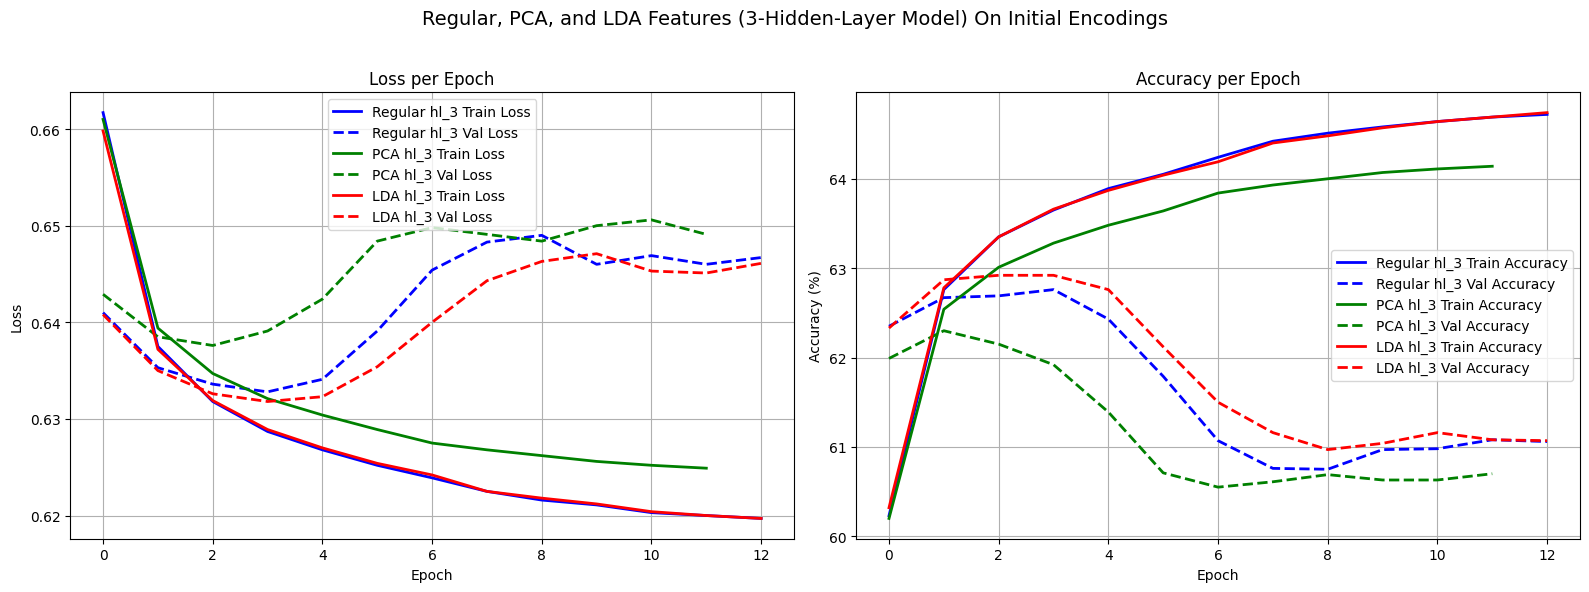

In [8]:
hl_3_train_losses_initial_encodings, hl_3_train_accuracies_initial_encodings, hl_3_val_losses_initial_encodings, hl_3_val_accuracies_initial_encodings = extract_training_metrics("hl_3_initial_encodings", hl_3_initial_encodings_logs)

pca_hl_3_train_losses_initial_encodings, pca_hl_3_train_accuracies_initial_encodings, pca_hl_3_val_losses_initial_encodings, pca_hl_3_val_accuracies_initial_encodings = extract_training_metrics("pca_hl_3_initial_encodings", pca_hl_3_initial_encodings_logs)

lda_hl_3_train_losses_initial_encodings, lda_hl_3_train_accuracies_initial_encodings, lda_hl_3_val_losses_initial_encodings, lda_hl_3_val_accuracies_initial_encodings = extract_training_metrics("lda_hl_3_initial_encodings", lda_hl_3_initial_encodings_logs)


import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Loss on ax1
ax1.plot(hl_3_train_losses_initial_encodings, label='Regular hl_3 Train Loss', color='b', linestyle='-', linewidth=2)
ax1.plot(hl_3_val_losses_initial_encodings, label='Regular hl_3 Val Loss', color='b', linestyle='--', linewidth=2)

ax1.plot(pca_hl_3_train_losses_initial_encodings, label='PCA hl_3 Train Loss', color='g', linestyle='-', linewidth=2)
ax1.plot(pca_hl_3_val_losses_initial_encodings, label='PCA hl_3 Val Loss', color='g', linestyle='--', linewidth=2)

ax1.plot(lda_hl_3_train_losses_initial_encodings, label='LDA hl_3 Train Loss', color='r', linestyle='-', linewidth=2)
ax1.plot(lda_hl_3_val_losses_initial_encodings, label='LDA hl_3 Val Loss', color='r', linestyle='--', linewidth=2)

ax1.set_title('Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

# Plotting Accuracy on ax2
ax2.plot(hl_3_train_accuracies_initial_encodings, label='Regular hl_3 Train Accuracy', color='b', linestyle='-', linewidth=2)
ax2.plot(hl_3_val_accuracies_initial_encodings, label='Regular hl_3 Val Accuracy', color='b', linestyle='--', linewidth=2)

ax2.plot(pca_hl_3_train_accuracies_initial_encodings, label='PCA hl_3 Train Accuracy', color='g', linestyle='-', linewidth=2)
ax2.plot(pca_hl_3_val_accuracies_initial_encodings, label='PCA hl_3 Val Accuracy', color='g', linestyle='--', linewidth=2)

ax2.plot(lda_hl_3_train_accuracies_initial_encodings, label='LDA hl_3 Train Accuracy', color='r', linestyle='-', linewidth=2)
ax2.plot(lda_hl_3_val_accuracies_initial_encodings, label='LDA hl_3 Val Accuracy', color='r', linestyle='--', linewidth=2)

ax2.set_title('Accuracy per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.grid(True)
ax2.legend()

plt.suptitle('Regular, PCA, and LDA Features (3-Hidden-Layer Model) On Initial Encodings', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [9]:
hl_3_advanced_encodings_logs = '''
Epoch 1/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:18<00:00, 25.17it/s, acc=63.06%, loss=0.6315]
Epoch 1 Loss: 0.6632, Train Accuracy: 60.20%
Test Loss: 0.6362, Test Accuracy: 63.01%
Epoch 2/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:15<00:00, 25.70it/s, acc=62.80%, loss=0.6297]
Epoch 2 Loss: 0.6371, Train Accuracy: 62.87%
Test Loss: 0.6276, Test Accuracy: 63.71%
Epoch 3/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.44it/s, acc=63.47%, loss=0.6338]
Epoch 3 Loss: 0.6309, Train Accuracy: 63.48%
Test Loss: 0.6245, Test Accuracy: 64.04%
Epoch 4/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.58it/s, acc=63.88%, loss=0.6299]
Epoch 4 Loss: 0.6281, Train Accuracy: 63.78%
Test Loss: 0.6228, Test Accuracy: 64.24%
Epoch 5/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.49it/s, acc=64.96%, loss=0.6231]
Epoch 5 Loss: 0.6264, Train Accuracy: 63.96%
Test Loss: 0.6215, Test Accuracy: 64.39%
Epoch 6/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.56it/s, acc=62.29%, loss=0.6307]
Epoch 6 Loss: 0.6251, Train Accuracy: 64.12%
Test Loss: 0.6204, Test Accuracy: 64.57%
Epoch 7/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.47it/s, acc=64.85%, loss=0.6208]
Epoch 7 Loss: 0.6237, Train Accuracy: 64.30%
Test Loss: 0.6189, Test Accuracy: 64.74%
Epoch 8/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.55it/s, acc=63.67%, loss=0.6265]
Epoch 8 Loss: 0.6224, Train Accuracy: 64.48%
Test Loss: 0.6179, Test Accuracy: 64.87%
Epoch 9/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:17<00:00, 25.38it/s, acc=63.57%, loss=0.6312]
Epoch 9 Loss: 0.6215, Train Accuracy: 64.57%
Test Loss: 0.6171, Test Accuracy: 64.97%
Epoch 10/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.56it/s, acc=62.24%, loss=0.6318]
Epoch 10 Loss: 0.6206, Train Accuracy: 64.68%
Test Loss: 0.6164, Test Accuracy: 65.04%
Epoch 11/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.55it/s, acc=64.85%, loss=0.6229]
Epoch 11 Loss: 0.6199, Train Accuracy: 64.74%
Test Loss: 0.6158, Test Accuracy: 65.08%
Epoch 12/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.47it/s, acc=63.47%, loss=0.6296]
Epoch 12 Loss: 0.6193, Train Accuracy: 64.80%
Test Loss: 0.6154, Test Accuracy: 65.14%
Epoch 13/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.48it/s, acc=65.52%, loss=0.6246]
Epoch 13 Loss: 0.6188, Train Accuracy: 64.87%
Test Loss: 0.6147, Test Accuracy: 65.19%
Epoch 14/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=65.37%, loss=0.6082]
Epoch 14 Loss: 0.6182, Train Accuracy: 64.94%
Test Loss: 0.6142, Test Accuracy: 65.24%
Epoch 15/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.51it/s, acc=64.08%, loss=0.6187]
Epoch 15 Loss: 0.6179, Train Accuracy: 64.97%
Test Loss: 0.6140, Test Accuracy: 65.30%
Epoch 16/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=65.16%, loss=0.6220]
Epoch 16 Loss: 0.6174, Train Accuracy: 65.01%
Test Loss: 0.6134, Test Accuracy: 65.36%
Epoch 17/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.53it/s, acc=65.37%, loss=0.6133]
Epoch 17 Loss: 0.6171, Train Accuracy: 65.04%
Test Loss: 0.6133, Test Accuracy: 65.36%
Epoch 18/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.41it/s, acc=67.62%, loss=0.6081]
Epoch 18 Loss: 0.6169, Train Accuracy: 65.08%
Test Loss: 0.6131, Test Accuracy: 65.40%
Epoch 19/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.44it/s, acc=64.60%, loss=0.6172]
Epoch 19 Loss: 0.6165, Train Accuracy: 65.12%
Test Loss: 0.6123, Test Accuracy: 65.43%
Epoch 20/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.35it/s, acc=63.57%, loss=0.6178]
Epoch 20 Loss: 0.6163, Train Accuracy: 65.13%
Test Loss: 0.6123, Test Accuracy: 65.46%
Epoch 21/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.73it/s, acc=64.55%, loss=0.6177]
Epoch 21 Loss: 0.6160, Train Accuracy: 65.15%
Test Loss: 0.6124, Test Accuracy: 65.45%
Epoch 22/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.68it/s, acc=64.75%, loss=0.6216]
Epoch 22 Loss: 0.6158, Train Accuracy: 65.19%
Test Loss: 0.6122, Test Accuracy: 65.49%
Epoch 23/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.70it/s, acc=65.06%, loss=0.6237]
Epoch 23 Loss: 0.6156, Train Accuracy: 65.22%
Test Loss: 0.6116, Test Accuracy: 65.55%
Epoch 24/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.69it/s, acc=65.78%, loss=0.6120]
Epoch 24 Loss: 0.6154, Train Accuracy: 65.24%
Test Loss: 0.6113, Test Accuracy: 65.58%
Epoch 25/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.74it/s, acc=65.73%, loss=0.6083]
Epoch 25 Loss: 0.6152, Train Accuracy: 65.26%
Test Loss: 0.6113, Test Accuracy: 65.59%
Epoch 26/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.69it/s, acc=65.67%, loss=0.6168]
Epoch 26 Loss: 0.6150, Train Accuracy: 65.27%
Test Loss: 0.6111, Test Accuracy: 65.59%
Epoch 27/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.66it/s, acc=65.67%, loss=0.6131]
Epoch 27 Loss: 0.6149, Train Accuracy: 65.28%
Test Loss: 0.6112, Test Accuracy: 65.59%
Epoch 28/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.75it/s, acc=64.91%, loss=0.6137]
Epoch 28 Loss: 0.6147, Train Accuracy: 65.31%
Test Loss: 0.6113, Test Accuracy: 65.57%
Epoch 29/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.70it/s, acc=64.34%, loss=0.6279]
Epoch 29 Loss: 0.6145, Train Accuracy: 65.34%
Test Loss: 0.6107, Test Accuracy: 65.65%
Epoch 30/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.74it/s, acc=65.42%, loss=0.6162]
Epoch 30 Loss: 0.6144, Train Accuracy: 65.35%
Test Loss: 0.6105, Test Accuracy: 65.65%
Epoch 31/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.72it/s, acc=65.78%, loss=0.6106]
Epoch 31 Loss: 0.6142, Train Accuracy: 65.37%
Test Loss: 0.6104, Test Accuracy: 65.66%
Epoch 32/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.77it/s, acc=66.60%, loss=0.6064]
Epoch 32 Loss: 0.6141, Train Accuracy: 65.37%
Test Loss: 0.6104, Test Accuracy: 65.68%
Epoch 33/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.68it/s, acc=64.60%, loss=0.6143]
Epoch 33 Loss: 0.6140, Train Accuracy: 65.38%
Test Loss: 0.6100, Test Accuracy: 65.69%
Epoch 34/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.66it/s, acc=64.29%, loss=0.6122]
Epoch 34 Loss: 0.6139, Train Accuracy: 65.39%
Test Loss: 0.6100, Test Accuracy: 65.73%
Epoch 35/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.62it/s, acc=64.80%, loss=0.6221]
Epoch 35 Loss: 0.6138, Train Accuracy: 65.42%
Test Loss: 0.6099, Test Accuracy: 65.71%
Epoch 36/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.53it/s, acc=64.55%, loss=0.6156]
Epoch 36 Loss: 0.6137, Train Accuracy: 65.43%
Test Loss: 0.6100, Test Accuracy: 65.70%
Epoch 37/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.69it/s, acc=63.01%, loss=0.6269]
Epoch 37 Loss: 0.6136, Train Accuracy: 65.42%
Test Loss: 0.6098, Test Accuracy: 65.73%
Epoch 38/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.67it/s, acc=65.93%, loss=0.6061]
Epoch 38 Loss: 0.6135, Train Accuracy: 65.46%
Test Loss: 0.6096, Test Accuracy: 65.75%
Epoch 39/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.74it/s, acc=67.62%, loss=0.5993]
Epoch 39 Loss: 0.6134, Train Accuracy: 65.46%
Test Loss: 0.6098, Test Accuracy: 65.77%
Epoch 40/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.56it/s, acc=64.60%, loss=0.6300]
Epoch 40 Loss: 0.6132, Train Accuracy: 65.48%
Test Loss: 0.6095, Test Accuracy: 65.79%
Epoch 41/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.61it/s, acc=65.88%, loss=0.6154]
Epoch 41 Loss: 0.6133, Train Accuracy: 65.47%
Test Loss: 0.6093, Test Accuracy: 65.77%
Epoch 42/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.54it/s, acc=63.98%, loss=0.6142]
Epoch 42 Loss: 0.6131, Train Accuracy: 65.47%
Test Loss: 0.6094, Test Accuracy: 65.78%
Epoch 43/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.69it/s, acc=64.70%, loss=0.6161]
Epoch 43 Loss: 0.6131, Train Accuracy: 65.49%
Test Loss: 0.6093, Test Accuracy: 65.78%
Epoch 44/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.62it/s, acc=65.42%, loss=0.6091]
Epoch 44 Loss: 0.6130, Train Accuracy: 65.48%
Test Loss: 0.6091, Test Accuracy: 65.82%
Epoch 45/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=66.03%, loss=0.6148]
Epoch 45 Loss: 0.6129, Train Accuracy: 65.50%
Test Loss: 0.6091, Test Accuracy: 65.81%
Epoch 46/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.47it/s, acc=65.83%, loss=0.6212]
Epoch 46 Loss: 0.6128, Train Accuracy: 65.51%
Test Loss: 0.6090, Test Accuracy: 65.81%
Epoch 47/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.40it/s, acc=66.80%, loss=0.6108]
Epoch 47 Loss: 0.6127, Train Accuracy: 65.51%
Test Loss: 0.6089, Test Accuracy: 65.80%
Epoch 48/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.45it/s, acc=64.39%, loss=0.6262]
Epoch 48 Loss: 0.6127, Train Accuracy: 65.54%
Test Loss: 0.6088, Test Accuracy: 65.82%
Epoch 49/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=66.29%, loss=0.6001]
Epoch 49 Loss: 0.6126, Train Accuracy: 65.53%
Test Loss: 0.6090, Test Accuracy: 65.81%
Epoch 50/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.54it/s, acc=65.16%, loss=0.6108]
Epoch 50 Loss: 0.6126, Train Accuracy: 65.54%
Test Loss: 0.6087, Test Accuracy: 65.81%
Epoch 51/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.61it/s, acc=64.39%, loss=0.6179]
Epoch 51 Loss: 0.6124, Train Accuracy: 65.55%
Test Loss: 0.6087, Test Accuracy: 65.81%
Epoch 52/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.83it/s, acc=64.91%, loss=0.6175]
Epoch 52 Loss: 0.6124, Train Accuracy: 65.56%
Test Loss: 0.6087, Test Accuracy: 65.85%
Epoch 53/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.55it/s, acc=66.44%, loss=0.6111]
Epoch 53 Loss: 0.6125, Train Accuracy: 65.55%
Test Loss: 0.6087, Test Accuracy: 65.83%
Learning rate changed from 0.000100 to 0.000050
Epoch 54/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.65it/s, acc=66.39%, loss=0.6072]
Epoch 54 Loss: 0.6112, Train Accuracy: 65.68%
Test Loss: 0.6074, Test Accuracy: 65.96%
Epoch 55/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.62it/s, acc=65.62%, loss=0.6106]
Epoch 55 Loss: 0.6107, Train Accuracy: 65.73%
Test Loss: 0.6072, Test Accuracy: 66.00%
Epoch 56/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.42it/s, acc=65.67%, loss=0.6101]
Epoch 56 Loss: 0.6106, Train Accuracy: 65.73%
Test Loss: 0.6071, Test Accuracy: 65.99%
Epoch 57/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.44it/s, acc=67.62%, loss=0.6049]
Epoch 57 Loss: 0.6105, Train Accuracy: 65.75%
Test Loss: 0.6069, Test Accuracy: 66.03%
Epoch 58/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.41it/s, acc=65.62%, loss=0.6197]
Epoch 58 Loss: 0.6103, Train Accuracy: 65.75%
Test Loss: 0.6088, Test Accuracy: 65.87%
Epoch 59/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.45it/s, acc=66.60%, loss=0.6022]
Epoch 59 Loss: 0.6103, Train Accuracy: 65.77%
Test Loss: 0.6070, Test Accuracy: 66.01%
Epoch 60/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.47it/s, acc=66.96%, loss=0.6054]
Epoch 60 Loss: 0.6103, Train Accuracy: 65.76%
Test Loss: 0.6071, Test Accuracy: 66.01%
Learning rate changed from 0.000050 to 0.000025
Epoch 61/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.48it/s, acc=65.78%, loss=0.6102]
Epoch 61 Loss: 0.6095, Train Accuracy: 65.83%
Test Loss: 0.6062, Test Accuracy: 66.07%
Epoch 62/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.33it/s, acc=67.78%, loss=0.5924]
Epoch 62 Loss: 0.6093, Train Accuracy: 65.86%
Test Loss: 0.6061, Test Accuracy: 66.09%
Epoch 63/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=65.98%, loss=0.6046]
Epoch 63 Loss: 0.6091, Train Accuracy: 65.88%
Test Loss: 0.6062, Test Accuracy: 66.08%
Epoch 64/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=65.93%, loss=0.6123]
Epoch 64 Loss: 0.6091, Train Accuracy: 65.88%
Test Loss: 0.6063, Test Accuracy: 66.06%
Epoch 65/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.54it/s, acc=66.75%, loss=0.6060]
Epoch 65 Loss: 0.6090, Train Accuracy: 65.89%
Test Loss: 0.6061, Test Accuracy: 66.09%
Learning rate changed from 0.000025 to 0.000013
Epoch 66/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.52it/s, acc=67.52%, loss=0.6033]
Epoch 66 Loss: 0.6086, Train Accuracy: 65.93%
Test Loss: 0.6059, Test Accuracy: 66.11%
Epoch 67/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.37it/s, acc=66.24%, loss=0.6071]
Epoch 67 Loss: 0.6085, Train Accuracy: 65.94%
Test Loss: 0.6059, Test Accuracy: 66.13%
Epoch 68/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.42it/s, acc=66.03%, loss=0.6101]
Epoch 68 Loss: 0.6083, Train Accuracy: 65.95%
Test Loss: 0.6057, Test Accuracy: 66.13%
Epoch 69/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.37it/s, acc=65.26%, loss=0.6213]
Epoch 69 Loss: 0.6083, Train Accuracy: 65.96%
Test Loss: 0.6058, Test Accuracy: 66.13%
Epoch 70/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.51it/s, acc=65.42%, loss=0.5992]
Epoch 70 Loss: 0.6083, Train Accuracy: 65.96%
Test Loss: 0.6058, Test Accuracy: 66.15%
Epoch 71/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.45it/s, acc=67.47%, loss=0.6037]
Epoch 71 Loss: 0.6082, Train Accuracy: 65.96%
Test Loss: 0.6057, Test Accuracy: 66.14%
Learning rate changed from 0.000013 to 0.000006
Epoch 72/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.49it/s, acc=66.14%, loss=0.6078]
Epoch 72 Loss: 0.6079, Train Accuracy: 66.00%
Test Loss: 0.6058, Test Accuracy: 66.14%
Epoch 73/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.35it/s, acc=65.78%, loss=0.6056]
Epoch 73 Loss: 0.6079, Train Accuracy: 65.99%
Test Loss: 0.6057, Test Accuracy: 66.14%
Epoch 74/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.53it/s, acc=66.80%, loss=0.6066]
Epoch 74 Loss: 0.6078, Train Accuracy: 66.01%
Test Loss: 0.6056, Test Accuracy: 66.15%
Epoch 75/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.55it/s, acc=66.29%, loss=0.6046]
Epoch 75 Loss: 0.6078, Train Accuracy: 66.02%
Test Loss: 0.6056, Test Accuracy: 66.16%
Epoch 76/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.55it/s, acc=65.93%, loss=0.6134]
Epoch 76 Loss: 0.6077, Train Accuracy: 66.02%
Test Loss: 0.6055, Test Accuracy: 66.17%
Epoch 77/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.50it/s, acc=67.83%, loss=0.5926]
Epoch 77 Loss: 0.6079, Train Accuracy: 66.00%
Test Loss: 0.6055, Test Accuracy: 66.17%
Epoch 78/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=67.37%, loss=0.5976]
Epoch 78 Loss: 0.6077, Train Accuracy: 66.00%
Test Loss: 0.6055, Test Accuracy: 66.15%
Epoch 79/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.39it/s, acc=65.11%, loss=0.6069]
Epoch 79 Loss: 0.6078, Train Accuracy: 66.01%
Test Loss: 0.6055, Test Accuracy: 66.17%
Epoch 80/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.36it/s, acc=67.37%, loss=0.5974]
Epoch 80 Loss: 0.6076, Train Accuracy: 66.02%
Test Loss: 0.6054, Test Accuracy: 66.17%
Learning rate changed from 0.000006 to 0.000003
Epoch 81/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.39it/s, acc=66.70%, loss=0.6099]
Epoch 81 Loss: 0.6076, Train Accuracy: 66.02%
Test Loss: 0.6054, Test Accuracy: 66.17%
Epoch 82/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=64.96%, loss=0.6039]
Epoch 82 Loss: 0.6076, Train Accuracy: 66.02%
Test Loss: 0.6055, Test Accuracy: 66.15%
Epoch 83/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.51it/s, acc=64.55%, loss=0.6189]
Epoch 83 Loss: 0.6075, Train Accuracy: 66.03%
Test Loss: 0.6054, Test Accuracy: 66.17%
Learning rate changed from 0.000003 to 0.000002
Epoch 84/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.41it/s, acc=65.73%, loss=0.6156]
Epoch 84 Loss: 0.6074, Train Accuracy: 66.05%
Test Loss: 0.6053, Test Accuracy: 66.18%
Epoch 85/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.60it/s, acc=65.52%, loss=0.6074]
Epoch 85 Loss: 0.6074, Train Accuracy: 66.04%
Test Loss: 0.6054, Test Accuracy: 66.17%
Epoch 86/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.59it/s, acc=67.78%, loss=0.5942]
Epoch 86 Loss: 0.6074, Train Accuracy: 66.04%
Test Loss: 0.6054, Test Accuracy: 66.17%
Epoch 87/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.68it/s, acc=65.93%, loss=0.6067]
Epoch 87 Loss: 0.6074, Train Accuracy: 66.05%
Test Loss: 0.6054, Test Accuracy: 66.17%
Learning rate changed from 0.000002 to 0.000001
Epoch 88/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.66it/s, acc=67.52%, loss=0.5952]
Epoch 88 Loss: 0.6073, Train Accuracy: 66.04%
Test Loss: 0.6053, Test Accuracy: 66.17%
Epoch 89/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.58it/s, acc=64.60%, loss=0.6184]
Epoch 89 Loss: 0.6074, Train Accuracy: 66.02%
Test Loss: 0.6053, Test Accuracy: 66.18%
Epoch 90/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.62it/s, acc=66.19%, loss=0.6052]
Epoch 90 Loss: 0.6074, Train Accuracy: 66.04%
Test Loss: 0.6053, Test Accuracy: 66.18%
Learning rate changed from 0.000001 to 0.000000
Epoch 91/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.53it/s, acc=67.16%, loss=0.6110]
Epoch 91 Loss: 0.6073, Train Accuracy: 66.05%
Test Loss: 0.6053, Test Accuracy: 66.19%
Epoch 92/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.67it/s, acc=65.83%, loss=0.6071]
Epoch 92 Loss: 0.6073, Train Accuracy: 66.05%
Test Loss: 0.6054, Test Accuracy: 66.17%
Epoch 93/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.53it/s, acc=67.16%, loss=0.5963]
Epoch 93 Loss: 0.6073, Train Accuracy: 66.05%
Test Loss: 0.6053, Test Accuracy: 66.18%
Learning rate changed from 0.000000 to 0.000000
Epoch 94/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.65it/s, acc=65.83%, loss=0.6123]
Epoch 94 Loss: 0.6074, Train Accuracy: 66.05%
Test Loss: 0.6053, Test Accuracy: 66.18%
Epoch 95/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.62it/s, acc=65.37%, loss=0.6168]
Epoch 95 Loss: 0.6073, Train Accuracy: 66.06%
Test Loss: 0.6053, Test Accuracy: 66.17%
Epoch 96/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.59it/s, acc=63.31%, loss=0.6172]
Epoch 96 Loss: 0.6073, Train Accuracy: 66.06%
Test Loss: 0.6054, Test Accuracy: 66.18%
Learning rate changed from 0.000000 to 0.000000
Epoch 97/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.53it/s, acc=67.06%, loss=0.6116]
Epoch 97 Loss: 0.6073, Train Accuracy: 66.06%
Test Loss: 0.6054, Test Accuracy: 66.18%
Epoch 98/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.62it/s, acc=65.26%, loss=0.6138]
Epoch 98 Loss: 0.6073, Train Accuracy: 66.06%
Test Loss: 0.6053, Test Accuracy: 66.17%
Epoch 99/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.68it/s, acc=63.88%, loss=0.6308]
Epoch 99 Loss: 0.6073, Train Accuracy: 66.06%
Test Loss: 0.6053, Test Accuracy: 66.18%
Learning rate changed from 0.000000 to 0.000000
Early stopping triggered at epoch 99. Best model was from epoch 91.
'''

In [10]:
pca_hl_3_advanced_encodings_logs = '''
Epoch 1/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:18<00:00, 25.23it/s, acc=62.19%, loss=0.6406]
Epoch 1 Loss: 0.6632, Train Accuracy: 59.92%
Test Loss: 0.6365, Test Accuracy: 62.85%
Epoch 2/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.51it/s, acc=62.60%, loss=0.6361]
Epoch 2 Loss: 0.6385, Train Accuracy: 62.57%
Test Loss: 0.6291, Test Accuracy: 63.49%
Epoch 3/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.58it/s, acc=64.39%, loss=0.6258]
Epoch 3 Loss: 0.6327, Train Accuracy: 63.22%
Test Loss: 0.6261, Test Accuracy: 63.85%
Epoch 4/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.48it/s, acc=63.37%, loss=0.6312]
Epoch 4 Loss: 0.6299, Train Accuracy: 63.54%
Test Loss: 0.6242, Test Accuracy: 64.11%
Epoch 5/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.53it/s, acc=64.24%, loss=0.6276]
Epoch 5 Loss: 0.6281, Train Accuracy: 63.74%
Test Loss: 0.6229, Test Accuracy: 64.21%
Epoch 6/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:17<00:00, 25.42it/s, acc=64.19%, loss=0.6267]
Epoch 6 Loss: 0.6266, Train Accuracy: 63.90%
Test Loss: 0.6218, Test Accuracy: 64.35%
Epoch 7/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.46it/s, acc=65.11%, loss=0.6233]
Epoch 7 Loss: 0.6256, Train Accuracy: 64.04%
Test Loss: 0.6209, Test Accuracy: 64.44%
Epoch 8/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.46it/s, acc=64.14%, loss=0.6264]
Epoch 8 Loss: 0.6244, Train Accuracy: 64.19%
Test Loss: 0.6199, Test Accuracy: 64.59%
Epoch 9/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.45it/s, acc=65.57%, loss=0.6218]
Epoch 9 Loss: 0.6234, Train Accuracy: 64.32%
Test Loss: 0.6190, Test Accuracy: 64.72%
Epoch 10/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.37it/s, acc=64.80%, loss=0.6300]
Epoch 10 Loss: 0.6226, Train Accuracy: 64.43%
Test Loss: 0.6182, Test Accuracy: 64.78%
Epoch 11/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.42it/s, acc=65.67%, loss=0.6138]
Epoch 11 Loss: 0.6217, Train Accuracy: 64.53%
Test Loss: 0.6173, Test Accuracy: 64.90%
Epoch 12/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.58it/s, acc=64.65%, loss=0.6251]
Epoch 12 Loss: 0.6208, Train Accuracy: 64.63%
Test Loss: 0.6167, Test Accuracy: 64.99%
Epoch 13/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.51it/s, acc=63.37%, loss=0.6180]
Epoch 13 Loss: 0.6202, Train Accuracy: 64.70%
Test Loss: 0.6161, Test Accuracy: 65.05%
Epoch 14/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.53it/s, acc=64.65%, loss=0.6244]
Epoch 14 Loss: 0.6197, Train Accuracy: 64.74%
Test Loss: 0.6159, Test Accuracy: 65.06%
Epoch 15/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.46it/s, acc=64.39%, loss=0.6176]
Epoch 15 Loss: 0.6193, Train Accuracy: 64.80%
Test Loss: 0.6153, Test Accuracy: 65.14%
Epoch 16/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.46it/s, acc=65.32%, loss=0.6168]
Epoch 16 Loss: 0.6189, Train Accuracy: 64.85%
Test Loss: 0.6149, Test Accuracy: 65.17%
Epoch 17/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.64it/s, acc=64.44%, loss=0.6126]
Epoch 17 Loss: 0.6185, Train Accuracy: 64.89%
Test Loss: 0.6145, Test Accuracy: 65.25%
Epoch 18/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.25it/s, acc=64.65%, loss=0.6193]
Epoch 18 Loss: 0.6182, Train Accuracy: 64.92%
Test Loss: 0.6140, Test Accuracy: 65.28%
Epoch 19/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.31it/s, acc=67.16%, loss=0.6058]
Epoch 19 Loss: 0.6178, Train Accuracy: 64.95%
Test Loss: 0.6140, Test Accuracy: 65.26%
Epoch 20/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.60it/s, acc=64.29%, loss=0.6315]
Epoch 20 Loss: 0.6176, Train Accuracy: 64.98%
Test Loss: 0.6136, Test Accuracy: 65.34%
Epoch 21/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.49it/s, acc=65.11%, loss=0.6168]
Epoch 21 Loss: 0.6173, Train Accuracy: 65.02%
Test Loss: 0.6132, Test Accuracy: 65.36%
Epoch 22/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.41it/s, acc=64.49%, loss=0.6171]
Epoch 22 Loss: 0.6171, Train Accuracy: 65.04%
Test Loss: 0.6131, Test Accuracy: 65.37%
Epoch 23/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.46it/s, acc=64.39%, loss=0.6217]
Epoch 23 Loss: 0.6168, Train Accuracy: 65.07%
Test Loss: 0.6127, Test Accuracy: 65.40%
Epoch 24/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.49it/s, acc=66.09%, loss=0.6096]
Epoch 24 Loss: 0.6166, Train Accuracy: 65.09%
Test Loss: 0.6127, Test Accuracy: 65.43%
Epoch 25/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.45it/s, acc=66.70%, loss=0.6001]
Epoch 25 Loss: 0.6164, Train Accuracy: 65.12%
Test Loss: 0.6127, Test Accuracy: 65.46%
Epoch 26/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.51it/s, acc=66.34%, loss=0.6073]
Epoch 26 Loss: 0.6162, Train Accuracy: 65.13%
Test Loss: 0.6122, Test Accuracy: 65.47%
Epoch 27/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.37it/s, acc=64.39%, loss=0.6122]
Epoch 27 Loss: 0.6161, Train Accuracy: 65.15%
Test Loss: 0.6122, Test Accuracy: 65.48%
Epoch 28/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=64.34%, loss=0.6262]
Epoch 28 Loss: 0.6159, Train Accuracy: 65.17%
Test Loss: 0.6119, Test Accuracy: 65.46%
Epoch 29/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.48it/s, acc=65.06%, loss=0.6120]
Epoch 29 Loss: 0.6158, Train Accuracy: 65.17%
Test Loss: 0.6118, Test Accuracy: 65.52%
Epoch 30/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.31it/s, acc=63.93%, loss=0.6209]
Epoch 30 Loss: 0.6157, Train Accuracy: 65.20%
Test Loss: 0.6116, Test Accuracy: 65.51%
Epoch 31/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.55it/s, acc=66.39%, loss=0.6066]
Epoch 31 Loss: 0.6155, Train Accuracy: 65.21%
Test Loss: 0.6115, Test Accuracy: 65.55%
Epoch 32/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.45it/s, acc=63.88%, loss=0.6298]
Epoch 32 Loss: 0.6154, Train Accuracy: 65.23%
Test Loss: 0.6112, Test Accuracy: 65.58%
Epoch 33/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.44it/s, acc=64.14%, loss=0.6259]
Epoch 33 Loss: 0.6152, Train Accuracy: 65.23%
Test Loss: 0.6114, Test Accuracy: 65.53%
Epoch 34/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.50it/s, acc=66.34%, loss=0.6175]
Epoch 34 Loss: 0.6150, Train Accuracy: 65.25%
Test Loss: 0.6110, Test Accuracy: 65.62%
Epoch 35/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.50it/s, acc=65.11%, loss=0.6205]
Epoch 35 Loss: 0.6150, Train Accuracy: 65.24%
Test Loss: 0.6110, Test Accuracy: 65.61%
Epoch 36/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.50it/s, acc=66.70%, loss=0.5958]
Epoch 36 Loss: 0.6149, Train Accuracy: 65.28%
Test Loss: 0.6110, Test Accuracy: 65.60%
Epoch 37/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.45it/s, acc=66.44%, loss=0.6209]
Epoch 37 Loss: 0.6149, Train Accuracy: 65.27%
Test Loss: 0.6107, Test Accuracy: 65.65%
Epoch 38/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.46it/s, acc=64.08%, loss=0.6217]
Epoch 38 Loss: 0.6146, Train Accuracy: 65.29%
Test Loss: 0.6109, Test Accuracy: 65.65%
Epoch 39/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.49it/s, acc=66.96%, loss=0.6059]
Epoch 39 Loss: 0.6145, Train Accuracy: 65.31%
Test Loss: 0.6106, Test Accuracy: 65.65%
Epoch 40/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.46it/s, acc=64.91%, loss=0.6184]
Epoch 40 Loss: 0.6144, Train Accuracy: 65.32%
Test Loss: 0.6107, Test Accuracy: 65.67%
Epoch 41/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.49it/s, acc=65.16%, loss=0.6120]
Epoch 41 Loss: 0.6142, Train Accuracy: 65.33%
Test Loss: 0.6107, Test Accuracy: 65.67%
Epoch 42/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.50it/s, acc=66.34%, loss=0.6025]
Epoch 42 Loss: 0.6143, Train Accuracy: 65.34%
Test Loss: 0.6104, Test Accuracy: 65.67%
Epoch 43/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.41it/s, acc=64.08%, loss=0.6173]
Epoch 43 Loss: 0.6142, Train Accuracy: 65.34%
Test Loss: 0.6101, Test Accuracy: 65.69%
Epoch 44/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.37it/s, acc=64.14%, loss=0.6234]
Epoch 44 Loss: 0.6141, Train Accuracy: 65.35%
Test Loss: 0.6101, Test Accuracy: 65.68%
Epoch 45/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.39it/s, acc=66.60%, loss=0.6031]
Epoch 45 Loss: 0.6141, Train Accuracy: 65.35%
Test Loss: 0.6103, Test Accuracy: 65.65%
Epoch 46/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.58it/s, acc=65.32%, loss=0.6078]
Epoch 46 Loss: 0.6140, Train Accuracy: 65.36%
Test Loss: 0.6102, Test Accuracy: 65.67%
Learning rate changed from 0.000100 to 0.000050
Epoch 47/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.47it/s, acc=65.88%, loss=0.6036]
Epoch 47 Loss: 0.6128, Train Accuracy: 65.48%
Test Loss: 0.6092, Test Accuracy: 65.79%
Epoch 48/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=66.75%, loss=0.6012]
Epoch 48 Loss: 0.6124, Train Accuracy: 65.51%
Test Loss: 0.6090, Test Accuracy: 65.83%
Epoch 49/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.38it/s, acc=64.65%, loss=0.6184]
Epoch 49 Loss: 0.6122, Train Accuracy: 65.53%
Test Loss: 0.6091, Test Accuracy: 65.82%
Epoch 50/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.23it/s, acc=66.34%, loss=0.6072]
Epoch 50 Loss: 0.6121, Train Accuracy: 65.55%
Test Loss: 0.6091, Test Accuracy: 65.82%
Epoch 51/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.53it/s, acc=65.67%, loss=0.6096]
Epoch 51 Loss: 0.6121, Train Accuracy: 65.56%
Test Loss: 0.6089, Test Accuracy: 65.84%
Epoch 52/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.47it/s, acc=64.85%, loss=0.6106]
Epoch 52 Loss: 0.6119, Train Accuracy: 65.57%
Test Loss: 0.6088, Test Accuracy: 65.84%
Epoch 53/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=64.08%, loss=0.6217]
Epoch 53 Loss: 0.6119, Train Accuracy: 65.58%
Test Loss: 0.6089, Test Accuracy: 65.84%
Epoch 54/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.46it/s, acc=65.37%, loss=0.6158]
Epoch 54 Loss: 0.6119, Train Accuracy: 65.57%
Test Loss: 0.6087, Test Accuracy: 65.86%
Epoch 55/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.47it/s, acc=67.01%, loss=0.6063]
Epoch 55 Loss: 0.6118, Train Accuracy: 65.59%
Test Loss: 0.6088, Test Accuracy: 65.84%
Learning rate changed from 0.000050 to 0.000025
Epoch 56/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.47it/s, acc=65.88%, loss=0.6113]
Epoch 56 Loss: 0.6111, Train Accuracy: 65.66%
Test Loss: 0.6083, Test Accuracy: 65.90%
Epoch 57/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.12it/s, acc=64.55%, loss=0.6175]
Epoch 57 Loss: 0.6108, Train Accuracy: 65.68%
Test Loss: 0.6082, Test Accuracy: 65.90%
Epoch 58/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=65.57%, loss=0.6188]
Epoch 58 Loss: 0.6107, Train Accuracy: 65.69%
Test Loss: 0.6080, Test Accuracy: 65.92%
Epoch 59/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.47it/s, acc=65.16%, loss=0.6224]
Epoch 59 Loss: 0.6107, Train Accuracy: 65.71%
Test Loss: 0.6080, Test Accuracy: 65.93%
Epoch 60/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.44it/s, acc=65.01%, loss=0.6064]
Epoch 60 Loss: 0.6106, Train Accuracy: 65.71%
Test Loss: 0.6080, Test Accuracy: 65.93%
Epoch 61/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.53it/s, acc=65.98%, loss=0.6034]
Epoch 61 Loss: 0.6105, Train Accuracy: 65.71%
Test Loss: 0.6080, Test Accuracy: 65.92%
Learning rate changed from 0.000025 to 0.000013
Epoch 62/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.48it/s, acc=64.60%, loss=0.6212]
Epoch 62 Loss: 0.6102, Train Accuracy: 65.75%
Test Loss: 0.6079, Test Accuracy: 65.94%
Epoch 63/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.47it/s, acc=65.21%, loss=0.6129]
Epoch 63 Loss: 0.6099, Train Accuracy: 65.76%
Test Loss: 0.6078, Test Accuracy: 65.95%
Epoch 64/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.52it/s, acc=65.01%, loss=0.6137]
Epoch 64 Loss: 0.6099, Train Accuracy: 65.78%
Test Loss: 0.6078, Test Accuracy: 65.95%
Epoch 65/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.50it/s, acc=64.80%, loss=0.6205]
Epoch 65 Loss: 0.6099, Train Accuracy: 65.78%
Test Loss: 0.6077, Test Accuracy: 65.96%
Epoch 66/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.39it/s, acc=63.88%, loss=0.6199]
Epoch 66 Loss: 0.6098, Train Accuracy: 65.78%
Test Loss: 0.6077, Test Accuracy: 65.94%
Learning rate changed from 0.000013 to 0.000006
Epoch 67/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.51it/s, acc=65.83%, loss=0.6118]
Epoch 67 Loss: 0.6096, Train Accuracy: 65.82%
Test Loss: 0.6075, Test Accuracy: 65.96%
Epoch 68/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.46it/s, acc=64.49%, loss=0.6256]
Epoch 68 Loss: 0.6095, Train Accuracy: 65.83%
Test Loss: 0.6076, Test Accuracy: 65.96%
Epoch 69/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.45it/s, acc=65.78%, loss=0.6089]
Epoch 69 Loss: 0.6095, Train Accuracy: 65.81%
Test Loss: 0.6075, Test Accuracy: 65.96%
Epoch 70/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.42it/s, acc=65.73%, loss=0.5999]
Epoch 70 Loss: 0.6094, Train Accuracy: 65.84%
Test Loss: 0.6076, Test Accuracy: 65.97%
Learning rate changed from 0.000006 to 0.000003
Epoch 71/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.45it/s, acc=67.32%, loss=0.5972]
Epoch 71 Loss: 0.6093, Train Accuracy: 65.84%
Test Loss: 0.6075, Test Accuracy: 65.98%
Epoch 72/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.44it/s, acc=65.62%, loss=0.5971]
Epoch 72 Loss: 0.6093, Train Accuracy: 65.83%
Test Loss: 0.6075, Test Accuracy: 65.98%
Epoch 73/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.48it/s, acc=66.14%, loss=0.6020]
Epoch 73 Loss: 0.6092, Train Accuracy: 65.86%
Test Loss: 0.6075, Test Accuracy: 65.98%
Learning rate changed from 0.000003 to 0.000002
Epoch 74/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.51it/s, acc=65.26%, loss=0.6058]
Epoch 74 Loss: 0.6093, Train Accuracy: 65.85%
Test Loss: 0.6075, Test Accuracy: 65.98%
Epoch 75/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.50it/s, acc=65.52%, loss=0.6203]
Epoch 75 Loss: 0.6092, Train Accuracy: 65.83%
Test Loss: 0.6075, Test Accuracy: 65.97%
Epoch 76/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=66.60%, loss=0.5984]
Epoch 76 Loss: 0.6092, Train Accuracy: 65.85%
Test Loss: 0.6075, Test Accuracy: 65.98%
Learning rate changed from 0.000002 to 0.000001
Epoch 77/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.36it/s, acc=66.14%, loss=0.6015]
Epoch 77 Loss: 0.6091, Train Accuracy: 65.85%
Test Loss: 0.6075, Test Accuracy: 65.98%
Epoch 78/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.50it/s, acc=66.14%, loss=0.6066]
Epoch 78 Loss: 0.6091, Train Accuracy: 65.86%
Test Loss: 0.6075, Test Accuracy: 65.98%
Epoch 79/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.47it/s, acc=67.06%, loss=0.6029]
Epoch 79 Loss: 0.6091, Train Accuracy: 65.86%
Test Loss: 0.6075, Test Accuracy: 65.98%
Epoch 80/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.37it/s, acc=64.80%, loss=0.6142]
Epoch 80 Loss: 0.6091, Train Accuracy: 65.85%
Test Loss: 0.6074, Test Accuracy: 65.97%
Learning rate changed from 0.000001 to 0.000000
Epoch 81/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.45it/s, acc=65.42%, loss=0.6151]
Epoch 81 Loss: 0.6091, Train Accuracy: 65.85%
Test Loss: 0.6074, Test Accuracy: 65.98%
Epoch 82/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.47it/s, acc=64.03%, loss=0.6279]
Epoch 82 Loss: 0.6091, Train Accuracy: 65.87%
Test Loss: 0.6075, Test Accuracy: 65.98%
Early stopping triggered at epoch 82. Best model was from epoch 74.
'''

In [11]:
lda_hl_3_advanced_encodings_logs = '''
Epoch 1/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:15<00:00, 25.69it/s, acc=63.16%, loss=0.6333]
Epoch 1 Loss: 0.6618, Train Accuracy: 60.37%
Test Loss: 0.6351, Test Accuracy: 63.15%
Epoch 2/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:14<00:00, 25.83it/s, acc=61.67%, loss=0.6336]
Epoch 2 Loss: 0.6368, Train Accuracy: 62.90%
Test Loss: 0.6279, Test Accuracy: 63.71%
Epoch 3/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:15<00:00, 25.74it/s, acc=60.90%, loss=0.6402]
Epoch 3 Loss: 0.6311, Train Accuracy: 63.45%
Test Loss: 0.6250, Test Accuracy: 63.98%
Epoch 4/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:14<00:00, 25.84it/s, acc=63.01%, loss=0.6345]
Epoch 4 Loss: 0.6285, Train Accuracy: 63.72%
Test Loss: 0.6233, Test Accuracy: 64.18%
Epoch 5/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:15<00:00, 25.77it/s, acc=63.98%, loss=0.6249]
Epoch 5 Loss: 0.6269, Train Accuracy: 63.92%
Test Loss: 0.6221, Test Accuracy: 64.34%
Epoch 6/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:15<00:00, 25.79it/s, acc=62.80%, loss=0.6329]
Epoch 6 Loss: 0.6256, Train Accuracy: 64.06%
Test Loss: 0.6210, Test Accuracy: 64.51%
Epoch 7/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:15<00:00, 25.77it/s, acc=62.03%, loss=0.6353]
Epoch 7 Loss: 0.6244, Train Accuracy: 64.21%
Test Loss: 0.6199, Test Accuracy: 64.62%
Epoch 8/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:15<00:00, 25.80it/s, acc=65.06%, loss=0.6205]
Epoch 8 Loss: 0.6234, Train Accuracy: 64.35%
Test Loss: 0.6192, Test Accuracy: 64.69%
Epoch 9/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.62it/s, acc=64.44%, loss=0.6238]
Epoch 9 Loss: 0.6225, Train Accuracy: 64.44%
Test Loss: 0.6183, Test Accuracy: 64.78%
Epoch 10/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.89it/s, acc=64.24%, loss=0.6305]
Epoch 10 Loss: 0.6217, Train Accuracy: 64.52%
Test Loss: 0.6176, Test Accuracy: 64.88%
Epoch 11/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.87it/s, acc=64.29%, loss=0.6238]
Epoch 11 Loss: 0.6211, Train Accuracy: 64.61%
Test Loss: 0.6172, Test Accuracy: 64.92%
Epoch 12/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.76it/s, acc=65.78%, loss=0.6188]
Epoch 12 Loss: 0.6204, Train Accuracy: 64.68%
Test Loss: 0.6168, Test Accuracy: 64.95%
Epoch 13/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.89it/s, acc=63.88%, loss=0.6208]
Epoch 13 Loss: 0.6200, Train Accuracy: 64.72%
Test Loss: 0.6163, Test Accuracy: 65.04%
Epoch 14/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.87it/s, acc=65.01%, loss=0.6223]
Epoch 14 Loss: 0.6195, Train Accuracy: 64.78%
Test Loss: 0.6158, Test Accuracy: 65.10%
Epoch 15/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.87it/s, acc=64.19%, loss=0.6260]
Epoch 15 Loss: 0.6190, Train Accuracy: 64.84%
Test Loss: 0.6151, Test Accuracy: 65.15%
Epoch 16/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.83it/s, acc=66.09%, loss=0.6071]
Epoch 16 Loss: 0.6185, Train Accuracy: 64.91%
Test Loss: 0.6147, Test Accuracy: 65.21%
Epoch 17/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.87it/s, acc=64.80%, loss=0.6154]
Epoch 17 Loss: 0.6182, Train Accuracy: 64.94%
Test Loss: 0.6145, Test Accuracy: 65.22%
Epoch 18/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.56it/s, acc=64.75%, loss=0.6080]
Epoch 18 Loss: 0.6178, Train Accuracy: 64.97%
Test Loss: 0.6140, Test Accuracy: 65.27%
Epoch 19/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.45it/s, acc=63.83%, loss=0.6244]
Epoch 19 Loss: 0.6176, Train Accuracy: 64.99%
Test Loss: 0.6137, Test Accuracy: 65.28%
Epoch 20/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.85it/s, acc=63.98%, loss=0.6291]
Epoch 20 Loss: 0.6173, Train Accuracy: 65.02%
Test Loss: 0.6135, Test Accuracy: 65.32%
Epoch 21/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.59it/s, acc=63.72%, loss=0.6202]
Epoch 21 Loss: 0.6171, Train Accuracy: 65.04%
Test Loss: 0.6133, Test Accuracy: 65.33%
Epoch 22/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.76it/s, acc=65.67%, loss=0.6241]
Epoch 22 Loss: 0.6168, Train Accuracy: 65.07%
Test Loss: 0.6133, Test Accuracy: 65.31%
Epoch 23/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.76it/s, acc=64.14%, loss=0.6184]
Epoch 23 Loss: 0.6168, Train Accuracy: 65.09%
Test Loss: 0.6131, Test Accuracy: 65.39%
Epoch 24/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.79it/s, acc=65.21%, loss=0.6242]
Epoch 24 Loss: 0.6165, Train Accuracy: 65.12%
Test Loss: 0.6127, Test Accuracy: 65.41%
Epoch 25/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.74it/s, acc=67.11%, loss=0.6055]
Epoch 25 Loss: 0.6163, Train Accuracy: 65.12%
Test Loss: 0.6127, Test Accuracy: 65.43%
Epoch 26/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.83it/s, acc=64.19%, loss=0.6282]
Epoch 26 Loss: 0.6161, Train Accuracy: 65.16%
Test Loss: 0.6126, Test Accuracy: 65.42%
Epoch 27/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.76it/s, acc=64.24%, loss=0.6103]
Epoch 27 Loss: 0.6161, Train Accuracy: 65.16%
Test Loss: 0.6127, Test Accuracy: 65.47%
Epoch 28/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.91it/s, acc=65.37%, loss=0.6256]
Epoch 28 Loss: 0.6158, Train Accuracy: 65.19%
Test Loss: 0.6123, Test Accuracy: 65.46%
Epoch 29/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.91it/s, acc=64.70%, loss=0.6169]
Epoch 29 Loss: 0.6157, Train Accuracy: 65.19%
Test Loss: 0.6123, Test Accuracy: 65.48%
Epoch 30/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.90it/s, acc=66.39%, loss=0.6125]
Epoch 30 Loss: 0.6155, Train Accuracy: 65.22%
Test Loss: 0.6121, Test Accuracy: 65.48%
Epoch 31/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.89it/s, acc=63.88%, loss=0.6256]
Epoch 31 Loss: 0.6154, Train Accuracy: 65.23%
Test Loss: 0.6118, Test Accuracy: 65.49%
Epoch 32/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.93it/s, acc=64.08%, loss=0.6235]
Epoch 32 Loss: 0.6152, Train Accuracy: 65.23%
Test Loss: 0.6116, Test Accuracy: 65.52%
Epoch 33/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.90it/s, acc=64.85%, loss=0.6142]
Epoch 33 Loss: 0.6152, Train Accuracy: 65.24%
Test Loss: 0.6114, Test Accuracy: 65.56%
Epoch 34/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.86it/s, acc=66.24%, loss=0.6064]
Epoch 34 Loss: 0.6150, Train Accuracy: 65.27%
Test Loss: 0.6115, Test Accuracy: 65.56%
Epoch 35/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.90it/s, acc=64.19%, loss=0.6314]
Epoch 35 Loss: 0.6150, Train Accuracy: 65.28%
Test Loss: 0.6113, Test Accuracy: 65.57%
Epoch 36/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.68it/s, acc=65.16%, loss=0.6203]
Epoch 36 Loss: 0.6148, Train Accuracy: 65.30%
Test Loss: 0.6110, Test Accuracy: 65.57%
Epoch 37/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.83it/s, acc=64.49%, loss=0.6169]
Epoch 37 Loss: 0.6148, Train Accuracy: 65.31%
Test Loss: 0.6111, Test Accuracy: 65.57%
Epoch 38/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.78it/s, acc=66.75%, loss=0.6061]
Epoch 38 Loss: 0.6146, Train Accuracy: 65.30%
Test Loss: 0.6109, Test Accuracy: 65.58%
Epoch 39/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.74it/s, acc=65.32%, loss=0.6131]
Epoch 39 Loss: 0.6146, Train Accuracy: 65.31%
Test Loss: 0.6109, Test Accuracy: 65.57%
Epoch 40/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.95it/s, acc=64.03%, loss=0.6272]
Epoch 40 Loss: 0.6146, Train Accuracy: 65.31%
Test Loss: 0.6107, Test Accuracy: 65.61%
Epoch 41/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.85it/s, acc=65.88%, loss=0.6170]
Epoch 41 Loss: 0.6145, Train Accuracy: 65.32%
Test Loss: 0.6111, Test Accuracy: 65.57%
Epoch 42/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.95it/s, acc=63.62%, loss=0.6275]
Epoch 42 Loss: 0.6143, Train Accuracy: 65.33%
Test Loss: 0.6107, Test Accuracy: 65.63%
Epoch 43/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.94it/s, acc=63.52%, loss=0.6273]
Epoch 43 Loss: 0.6143, Train Accuracy: 65.35%
Test Loss: 0.6104, Test Accuracy: 65.64%
Epoch 44/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.84it/s, acc=65.67%, loss=0.6071]
Epoch 44 Loss: 0.6142, Train Accuracy: 65.37%
Test Loss: 0.6104, Test Accuracy: 65.64%
Epoch 45/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.94it/s, acc=65.06%, loss=0.6180]
Epoch 45 Loss: 0.6142, Train Accuracy: 65.34%
Test Loss: 0.6105, Test Accuracy: 65.60%
Epoch 46/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.92it/s, acc=64.39%, loss=0.6271]
Epoch 46 Loss: 0.6141, Train Accuracy: 65.36%
Test Loss: 0.6105, Test Accuracy: 65.64%
Epoch 47/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.94it/s, acc=64.65%, loss=0.6171]
Epoch 47 Loss: 0.6141, Train Accuracy: 65.34%
Test Loss: 0.6103, Test Accuracy: 65.63%
Learning rate changed from 0.000100 to 0.000050
Epoch 48/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.95it/s, acc=65.83%, loss=0.6181]
Epoch 48 Loss: 0.6130, Train Accuracy: 65.49%
Test Loss: 0.6093, Test Accuracy: 65.74%
Epoch 49/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.90it/s, acc=65.73%, loss=0.6110]
Epoch 49 Loss: 0.6126, Train Accuracy: 65.49%
Test Loss: 0.6090, Test Accuracy: 65.75%
Epoch 50/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.93it/s, acc=66.70%, loss=0.6024]
Epoch 50 Loss: 0.6124, Train Accuracy: 65.52%
Test Loss: 0.6091, Test Accuracy: 65.78%
Epoch 51/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.90it/s, acc=65.47%, loss=0.6091]
Epoch 51 Loss: 0.6123, Train Accuracy: 65.55%
Test Loss: 0.6088, Test Accuracy: 65.79%
Epoch 52/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.85it/s, acc=63.11%, loss=0.6272]
Epoch 52 Loss: 0.6122, Train Accuracy: 65.55%
Test Loss: 0.6089, Test Accuracy: 65.78%
Epoch 53/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.85it/s, acc=65.47%, loss=0.6148]
Epoch 53 Loss: 0.6121, Train Accuracy: 65.55%
Test Loss: 0.6088, Test Accuracy: 65.78%
Epoch 54/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.92it/s, acc=64.85%, loss=0.6235]
Epoch 54 Loss: 0.6121, Train Accuracy: 65.56%
Test Loss: 0.6087, Test Accuracy: 65.79%
Epoch 55/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.94it/s, acc=64.96%, loss=0.6151]
Epoch 55 Loss: 0.6120, Train Accuracy: 65.56%
Test Loss: 0.6087, Test Accuracy: 65.78%
Epoch 56/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.89it/s, acc=62.96%, loss=0.6300]
Epoch 56 Loss: 0.6120, Train Accuracy: 65.55%
Test Loss: 0.6088, Test Accuracy: 65.81%
Epoch 57/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.91it/s, acc=64.39%, loss=0.6167]
Epoch 57 Loss: 0.6119, Train Accuracy: 65.57%
Test Loss: 0.6086, Test Accuracy: 65.81%
Epoch 58/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.93it/s, acc=65.47%, loss=0.6111]
Epoch 58 Loss: 0.6119, Train Accuracy: 65.57%
Test Loss: 0.6086, Test Accuracy: 65.82%
Epoch 59/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.93it/s, acc=65.42%, loss=0.6191]
Epoch 59 Loss: 0.6119, Train Accuracy: 65.58%
Test Loss: 0.6087, Test Accuracy: 65.80%
Epoch 60/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.89it/s, acc=64.80%, loss=0.6026]
Epoch 60 Loss: 0.6118, Train Accuracy: 65.57%
Test Loss: 0.6085, Test Accuracy: 65.82%
Learning rate changed from 0.000050 to 0.000025
Epoch 61/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.91it/s, acc=63.67%, loss=0.6105]
Epoch 61 Loss: 0.6110, Train Accuracy: 65.66%
Test Loss: 0.6080, Test Accuracy: 65.87%
Epoch 62/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.49it/s, acc=66.24%, loss=0.6102]
Epoch 62 Loss: 0.6108, Train Accuracy: 65.67%
Test Loss: 0.6078, Test Accuracy: 65.89%
Epoch 63/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.50it/s, acc=66.70%, loss=0.6059]
Epoch 63 Loss: 0.6107, Train Accuracy: 65.68%
Test Loss: 0.6078, Test Accuracy: 65.89%
Epoch 64/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.88it/s, acc=65.73%, loss=0.6086]
Epoch 64 Loss: 0.6106, Train Accuracy: 65.69%
Test Loss: 0.6078, Test Accuracy: 65.89%
Epoch 65/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.95it/s, acc=66.09%, loss=0.6012]
Epoch 65 Loss: 0.6106, Train Accuracy: 65.70%
Test Loss: 0.6077, Test Accuracy: 65.90%
Epoch 66/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.91it/s, acc=66.34%, loss=0.6023]
Epoch 66 Loss: 0.6105, Train Accuracy: 65.70%
Test Loss: 0.6077, Test Accuracy: 65.92%
Epoch 67/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.93it/s, acc=69.01%, loss=0.5937]
Epoch 67 Loss: 0.6105, Train Accuracy: 65.70%
Test Loss: 0.6077, Test Accuracy: 65.91%
Epoch 68/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.91it/s, acc=64.80%, loss=0.6125]
Epoch 68 Loss: 0.6104, Train Accuracy: 65.72%
Test Loss: 0.6076, Test Accuracy: 65.91%
Epoch 69/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.93it/s, acc=68.03%, loss=0.5973]
Epoch 69 Loss: 0.6103, Train Accuracy: 65.72%
Test Loss: 0.6076, Test Accuracy: 65.92%
Epoch 70/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.93it/s, acc=66.44%, loss=0.6066]
Epoch 70 Loss: 0.6104, Train Accuracy: 65.73%
Test Loss: 0.6075, Test Accuracy: 65.92%
Epoch 71/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.82it/s, acc=65.78%, loss=0.6107]
Epoch 71 Loss: 0.6103, Train Accuracy: 65.73%
Test Loss: 0.6075, Test Accuracy: 65.90%
Epoch 72/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.90it/s, acc=67.27%, loss=0.5979]
Epoch 72 Loss: 0.6103, Train Accuracy: 65.73%
Test Loss: 0.6077, Test Accuracy: 65.93%
Epoch 73/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.92it/s, acc=66.65%, loss=0.6133]
Epoch 73 Loss: 0.6102, Train Accuracy: 65.74%
Test Loss: 0.6076, Test Accuracy: 65.90%
Epoch 74/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.94it/s, acc=67.21%, loss=0.5892]
Epoch 74 Loss: 0.6102, Train Accuracy: 65.72%
Test Loss: 0.6075, Test Accuracy: 65.94%
Learning rate changed from 0.000025 to 0.000013
Epoch 75/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.93it/s, acc=66.14%, loss=0.6123]
Epoch 75 Loss: 0.6098, Train Accuracy: 65.78%
Test Loss: 0.6072, Test Accuracy: 65.95%
Epoch 76/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.74it/s, acc=65.01%, loss=0.6179]
Epoch 76 Loss: 0.6097, Train Accuracy: 65.79%
Test Loss: 0.6071, Test Accuracy: 65.97%
Epoch 77/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.91it/s, acc=66.75%, loss=0.6046]
Epoch 77 Loss: 0.6096, Train Accuracy: 65.79%
Test Loss: 0.6072, Test Accuracy: 65.96%
Epoch 78/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.85it/s, acc=65.42%, loss=0.6053]
Epoch 78 Loss: 0.6096, Train Accuracy: 65.81%
Test Loss: 0.6072, Test Accuracy: 65.96%
Epoch 79/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.92it/s, acc=63.52%, loss=0.6252]
Epoch 79 Loss: 0.6095, Train Accuracy: 65.81%
Test Loss: 0.6072, Test Accuracy: 65.98%
Learning rate changed from 0.000013 to 0.000006
Epoch 80/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.90it/s, acc=65.57%, loss=0.6067]
Epoch 80 Loss: 0.6093, Train Accuracy: 65.82%
Test Loss: 0.6070, Test Accuracy: 65.99%
Epoch 81/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.83it/s, acc=67.11%, loss=0.6020]
Epoch 81 Loss: 0.6092, Train Accuracy: 65.82%
Test Loss: 0.6071, Test Accuracy: 65.99%
Epoch 82/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.92it/s, acc=65.83%, loss=0.6070]
Epoch 82 Loss: 0.6092, Train Accuracy: 65.84%
Test Loss: 0.6070, Test Accuracy: 65.99%
Epoch 83/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.91it/s, acc=64.29%, loss=0.6163]
Epoch 83 Loss: 0.6091, Train Accuracy: 65.85%
Test Loss: 0.6069, Test Accuracy: 66.00%
Epoch 84/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.84it/s, acc=64.91%, loss=0.6026]
Epoch 84 Loss: 0.6090, Train Accuracy: 65.86%
Test Loss: 0.6070, Test Accuracy: 66.00%
Epoch 85/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.93it/s, acc=65.57%, loss=0.6068]
Epoch 85 Loss: 0.6091, Train Accuracy: 65.84%
Test Loss: 0.6069, Test Accuracy: 66.00%
Epoch 86/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.89it/s, acc=65.06%, loss=0.6174]
Epoch 86 Loss: 0.6090, Train Accuracy: 65.85%
Test Loss: 0.6069, Test Accuracy: 66.00%
Learning rate changed from 0.000006 to 0.000003
Epoch 87/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.94it/s, acc=64.29%, loss=0.6241]
Epoch 87 Loss: 0.6090, Train Accuracy: 65.86%
Test Loss: 0.6069, Test Accuracy: 66.01%
Epoch 88/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.89it/s, acc=65.78%, loss=0.6025]
Epoch 88 Loss: 0.6090, Train Accuracy: 65.85%
Test Loss: 0.6068, Test Accuracy: 66.01%
Epoch 89/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.94it/s, acc=66.39%, loss=0.6124]
Epoch 89 Loss: 0.6088, Train Accuracy: 65.86%
Test Loss: 0.6068, Test Accuracy: 66.02%
Epoch 90/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.94it/s, acc=65.06%, loss=0.6239]
Epoch 90 Loss: 0.6088, Train Accuracy: 65.86%
Test Loss: 0.6068, Test Accuracy: 66.02%
Epoch 91/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.89it/s, acc=66.75%, loss=0.5960]
Epoch 91 Loss: 0.6088, Train Accuracy: 65.87%
Test Loss: 0.6068, Test Accuracy: 66.02%
Epoch 92/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.92it/s, acc=65.93%, loss=0.6122]
Epoch 92 Loss: 0.6088, Train Accuracy: 65.87%
Test Loss: 0.6068, Test Accuracy: 66.02%
Epoch 93/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.90it/s, acc=67.62%, loss=0.6014]
Epoch 93 Loss: 0.6088, Train Accuracy: 65.86%
Test Loss: 0.6068, Test Accuracy: 66.02%
Learning rate changed from 0.000003 to 0.000002
Epoch 94/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.26it/s, acc=65.93%, loss=0.6095]
Epoch 94 Loss: 0.6087, Train Accuracy: 65.88%
Test Loss: 0.6068, Test Accuracy: 66.01%
Epoch 95/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.39it/s, acc=67.98%, loss=0.6005]
Epoch 95 Loss: 0.6088, Train Accuracy: 65.87%
Test Loss: 0.6068, Test Accuracy: 66.02%
Epoch 96/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:14<00:00, 25.84it/s, acc=65.06%, loss=0.6141]
Epoch 96 Loss: 0.6087, Train Accuracy: 65.88%
Test Loss: 0.6068, Test Accuracy: 66.02%
Learning rate changed from 0.000002 to 0.000001
Epoch 97/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:15<00:00, 25.68it/s, acc=64.44%, loss=0.6146]
Epoch 97 Loss: 0.6086, Train Accuracy: 65.89%
Test Loss: 0.6068, Test Accuracy: 66.01%
Epoch 98/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.20it/s, acc=64.91%, loss=0.6204]
Epoch 98 Loss: 0.6087, Train Accuracy: 65.88%
Test Loss: 0.6067, Test Accuracy: 66.01%
Epoch 99/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:16<00:00, 25.58it/s, acc=64.91%, loss=0.6115]
Epoch 99 Loss: 0.6086, Train Accuracy: 65.89%
Test Loss: 0.6068, Test Accuracy: 66.02%
Learning rate changed from 0.000001 to 0.000000
Epoch 100/100 - LR: 0.000000: 100%|███████████████████████████| 3485/3485 [02:15<00:00, 25.71it/s, acc=65.06%, loss=0.6085]
Epoch 100 Loss: 0.6087, Train Accuracy: 65.88%
Test Loss: 0.6068, Test Accuracy: 66.02%
'''

hl_3_advanced_encodings_train_losses = [0.6632, 0.6371, 0.6309, 0.6281, 0.6264, 0.6251, 0.6237, 0.6224, 0.6215, 0.6206, 0.6199, 0.6193, 0.6188, 0.6182, 0.6179, 0.6174, 0.6171, 0.6169, 0.6165, 0.6163, 0.616, 0.6158, 0.6156, 0.6154, 0.6152, 0.615, 0.6149, 0.6147, 0.6145, 0.6144, 0.6142, 0.6141, 0.614, 0.6139, 0.6138, 0.6137, 0.6136, 0.6135, 0.6134, 0.6132, 0.6133, 0.6131, 0.6131, 0.613, 0.6129, 0.6128, 0.6127, 0.6127, 0.6126, 0.6126, 0.6124, 0.6124, 0.6125, 0.6112, 0.6107, 0.6106, 0.6105, 0.6103, 0.6103, 0.6103, 0.6095, 0.6093, 0.6091, 0.6091, 0.609, 0.6086, 0.6085, 0.6083, 0.6083, 0.6083, 0.6082, 0.6079, 0.6079, 0.6078, 0.6078, 0.6077, 0.6079, 0.6077, 0.6078, 0.6076, 0.6076, 0.6076, 0.6075, 0.6074, 0.6074, 0.6074, 0.6074, 0.6073, 0.6074, 0.6074, 0.6073, 0.6073, 0.6073, 0.6074, 0.6073, 0.6073, 0.6073, 0.6073, 0.6073]
hl_3_advanced_encodings_train_accuracies = [60.2, 62.87, 63.48, 63.78, 63.96, 64.12, 64.3, 64.48, 64.57, 64.68, 64.74, 64.8, 64.87, 64.94, 64.97, 65.01, 65.04, 65.08, 65.12,

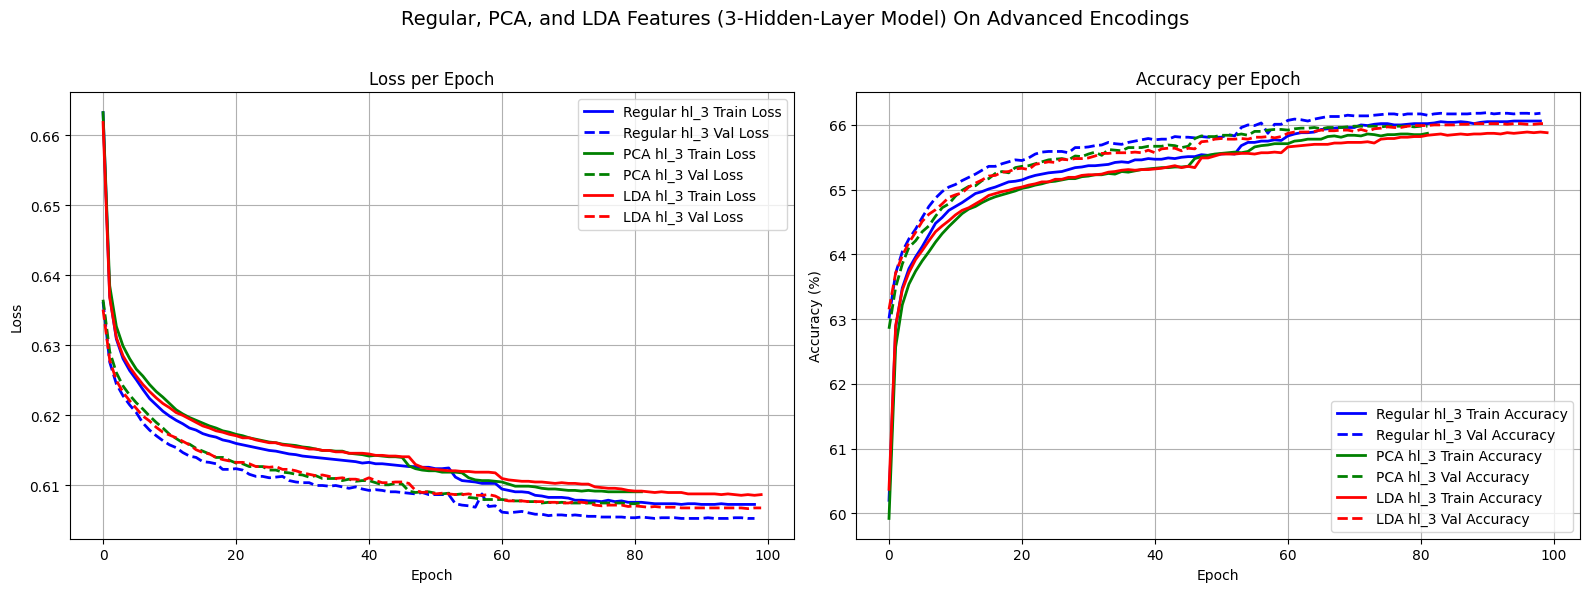

In [12]:
hl_3_train_losses_advanced_encodings, hl_3_train_accuracies_advanced_encodings, hl_3_val_losses_advanced_encodings, hl_3_val_accuracies_advanced_encodings = extract_training_metrics("hl_3_advanced_encodings", hl_3_advanced_encodings_logs)

pca_hl_3_train_losses_advanced_encodings, pca_hl_3_train_accuracies_advanced_encodings, pca_hl_3_val_losses_advanced_encodings, pca_hl_3_val_accuracies_advanced_encodings = extract_training_metrics("pca_hl_3_advanced_encodings", pca_hl_3_advanced_encodings_logs)

lda_hl_3_train_losses_advanced_encodings, lda_hl_3_train_accuracies_advanced_encodings, lda_hl_3_val_losses_advanced_encodings, lda_hl_3_val_accuracies_advanced_encodings = extract_training_metrics("lda_hl_3_advanced_encodings", lda_hl_3_advanced_encodings_logs)


import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Loss on ax1
ax1.plot(hl_3_train_losses_advanced_encodings, label='Regular hl_3 Train Loss', color='b', linestyle='-', linewidth=2)
ax1.plot(hl_3_val_losses_advanced_encodings, label='Regular hl_3 Val Loss', color='b', linestyle='--', linewidth=2)

ax1.plot(pca_hl_3_train_losses_advanced_encodings, label='PCA hl_3 Train Loss', color='g', linestyle='-', linewidth=2)
ax1.plot(pca_hl_3_val_losses_advanced_encodings, label='PCA hl_3 Val Loss', color='g', linestyle='--', linewidth=2)

ax1.plot(lda_hl_3_train_losses_advanced_encodings, label='LDA hl_3 Train Loss', color='r', linestyle='-', linewidth=2)
ax1.plot(lda_hl_3_val_losses_advanced_encodings, label='LDA hl_3 Val Loss', color='r', linestyle='--', linewidth=2)

ax1.set_title('Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

# Plotting Accuracy on ax2
ax2.plot(hl_3_train_accuracies_advanced_encodings, label='Regular hl_3 Train Accuracy', color='b', linestyle='-', linewidth=2)
ax2.plot(hl_3_val_accuracies_advanced_encodings, label='Regular hl_3 Val Accuracy', color='b', linestyle='--', linewidth=2)

ax2.plot(pca_hl_3_train_accuracies_advanced_encodings, label='PCA hl_3 Train Accuracy', color='g', linestyle='-', linewidth=2)
ax2.plot(pca_hl_3_val_accuracies_advanced_encodings, label='PCA hl_3 Val Accuracy', color='g', linestyle='--', linewidth=2)

ax2.plot(lda_hl_3_train_accuracies_advanced_encodings, label='LDA hl_3 Train Accuracy', color='r', linestyle='-', linewidth=2)
ax2.plot(lda_hl_3_val_accuracies_advanced_encodings, label='LDA hl_3 Val Accuracy', color='r', linestyle='--', linewidth=2)

ax2.set_title('Accuracy per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.grid(True)
ax2.legend()

plt.suptitle('Regular, PCA, and LDA Features (3-Hidden-Layer Model) On Advanced Encodings', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [13]:
hl_4_advanced_encodings_logs = '''
Epoch 1/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:22<00:00, 24.51it/s, acc=62.34%, loss=0.6412]
Epoch 1 Loss: 0.6630, Train Accuracy: 60.22%
Test Loss: 0.6347, Test Accuracy: 63.14%
Epoch 2/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:18<00:00, 25.09it/s, acc=62.44%, loss=0.6285]
Epoch 2 Loss: 0.6355, Train Accuracy: 63.02%
Test Loss: 0.6260, Test Accuracy: 63.88%
Epoch 3/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:18<00:00, 25.22it/s, acc=63.01%, loss=0.6279]
Epoch 3 Loss: 0.6297, Train Accuracy: 63.59%
Test Loss: 0.6235, Test Accuracy: 64.17%
Epoch 4/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:18<00:00, 25.18it/s, acc=64.14%, loss=0.6288]
Epoch 4 Loss: 0.6272, Train Accuracy: 63.89%
Test Loss: 0.6221, Test Accuracy: 64.29%
Epoch 5/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:17<00:00, 25.35it/s, acc=65.78%, loss=0.6084]
Epoch 5 Loss: 0.6256, Train Accuracy: 64.05%
Test Loss: 0.6209, Test Accuracy: 64.48%
Epoch 6/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:18<00:00, 25.19it/s, acc=63.62%, loss=0.6272]
Epoch 6 Loss: 0.6244, Train Accuracy: 64.20%
Test Loss: 0.6199, Test Accuracy: 64.57%
Epoch 7/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.51it/s, acc=63.52%, loss=0.6311]
Epoch 7 Loss: 0.6232, Train Accuracy: 64.35%
Test Loss: 0.6186, Test Accuracy: 64.74%
Epoch 8/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=63.88%, loss=0.6362]
Epoch 8 Loss: 0.6221, Train Accuracy: 64.48%
Test Loss: 0.6176, Test Accuracy: 64.86%
Epoch 9/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:18<00:00, 25.20it/s, acc=66.19%, loss=0.6071]
Epoch 9 Loss: 0.6211, Train Accuracy: 64.59%
Test Loss: 0.6166, Test Accuracy: 64.98%
Epoch 10/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.25it/s, acc=64.44%, loss=0.6198]
Epoch 10 Loss: 0.6202, Train Accuracy: 64.71%
Test Loss: 0.6163, Test Accuracy: 64.99%
Epoch 11/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.13it/s, acc=66.24%, loss=0.6073]
Epoch 11 Loss: 0.6194, Train Accuracy: 64.78%
Test Loss: 0.6152, Test Accuracy: 65.15%
Epoch 12/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.27it/s, acc=64.91%, loss=0.6269]
Epoch 12 Loss: 0.6186, Train Accuracy: 64.88%
Test Loss: 0.6145, Test Accuracy: 65.23%
Epoch 13/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.14it/s, acc=64.85%, loss=0.6123]
Epoch 13 Loss: 0.6181, Train Accuracy: 64.95%
Test Loss: 0.6141, Test Accuracy: 65.26%
Epoch 14/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.37it/s, acc=63.98%, loss=0.6246]
Epoch 14 Loss: 0.6176, Train Accuracy: 65.01%
Test Loss: 0.6135, Test Accuracy: 65.36%
Epoch 15/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.12it/s, acc=65.37%, loss=0.6222]
Epoch 15 Loss: 0.6170, Train Accuracy: 65.07%
Test Loss: 0.6128, Test Accuracy: 65.44%
Epoch 16/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.18it/s, acc=63.16%, loss=0.6369]
Epoch 16 Loss: 0.6165, Train Accuracy: 65.11%
Test Loss: 0.6126, Test Accuracy: 65.43%
Epoch 17/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.26it/s, acc=64.08%, loss=0.6111]
Epoch 17 Loss: 0.6161, Train Accuracy: 65.18%
Test Loss: 0.6121, Test Accuracy: 65.51%
Epoch 18/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.28it/s, acc=64.49%, loss=0.6154]
Epoch 18 Loss: 0.6157, Train Accuracy: 65.20%
Test Loss: 0.6118, Test Accuracy: 65.54%
Epoch 19/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.29it/s, acc=66.34%, loss=0.6116]
Epoch 19 Loss: 0.6154, Train Accuracy: 65.26%
Test Loss: 0.6115, Test Accuracy: 65.56%
Epoch 20/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.30it/s, acc=65.11%, loss=0.6222]
Epoch 20 Loss: 0.6150, Train Accuracy: 65.29%
Test Loss: 0.6111, Test Accuracy: 65.61%
Epoch 21/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.30it/s, acc=63.37%, loss=0.6343]
Epoch 21 Loss: 0.6148, Train Accuracy: 65.31%
Test Loss: 0.6109, Test Accuracy: 65.63%
Epoch 22/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.15it/s, acc=65.37%, loss=0.6082]
Epoch 22 Loss: 0.6145, Train Accuracy: 65.35%
Test Loss: 0.6105, Test Accuracy: 65.66%
Epoch 23/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.25it/s, acc=64.91%, loss=0.6116]
Epoch 23 Loss: 0.6142, Train Accuracy: 65.36%
Test Loss: 0.6102, Test Accuracy: 65.66%
Epoch 24/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.23it/s, acc=64.70%, loss=0.6268]
Epoch 24 Loss: 0.6139, Train Accuracy: 65.40%
Test Loss: 0.6100, Test Accuracy: 65.73%
Epoch 25/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.19it/s, acc=66.39%, loss=0.6116]
Epoch 25 Loss: 0.6138, Train Accuracy: 65.41%
Test Loss: 0.6096, Test Accuracy: 65.74%
Epoch 26/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.33it/s, acc=66.24%, loss=0.6032]
Epoch 26 Loss: 0.6136, Train Accuracy: 65.44%
Test Loss: 0.6096, Test Accuracy: 65.71%
Epoch 27/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.13it/s, acc=66.29%, loss=0.6021]
Epoch 27 Loss: 0.6133, Train Accuracy: 65.46%
Test Loss: 0.6097, Test Accuracy: 65.75%
Epoch 28/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.24it/s, acc=65.32%, loss=0.6086]
Epoch 28 Loss: 0.6131, Train Accuracy: 65.47%
Test Loss: 0.6090, Test Accuracy: 65.81%
Epoch 29/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.15it/s, acc=65.21%, loss=0.6129]
Epoch 29 Loss: 0.6130, Train Accuracy: 65.50%
Test Loss: 0.6093, Test Accuracy: 65.78%
Epoch 30/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.35it/s, acc=63.52%, loss=0.6328]
Epoch 30 Loss: 0.6128, Train Accuracy: 65.51%
Test Loss: 0.6091, Test Accuracy: 65.80%
Epoch 31/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.07it/s, acc=64.14%, loss=0.6265]
Epoch 31 Loss: 0.6126, Train Accuracy: 65.53%
Test Loss: 0.6086, Test Accuracy: 65.82%
Epoch 32/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 25.03it/s, acc=66.39%, loss=0.6062]
Epoch 32 Loss: 0.6126, Train Accuracy: 65.54%
Test Loss: 0.6087, Test Accuracy: 65.85%
Epoch 33/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:22<00:00, 24.52it/s, acc=65.47%, loss=0.6189]
Epoch 33 Loss: 0.6125, Train Accuracy: 65.55%
Test Loss: 0.6083, Test Accuracy: 65.86%
Epoch 34/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.93it/s, acc=63.62%, loss=0.6242]
Epoch 34 Loss: 0.6124, Train Accuracy: 65.55%
Test Loss: 0.6084, Test Accuracy: 65.87%
Epoch 35/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=66.09%, loss=0.6104]
Epoch 35 Loss: 0.6122, Train Accuracy: 65.56%
Test Loss: 0.6082, Test Accuracy: 65.88%
Epoch 36/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.84it/s, acc=66.03%, loss=0.6115]
Epoch 36 Loss: 0.6121, Train Accuracy: 65.57%
Test Loss: 0.6081, Test Accuracy: 65.85%
Epoch 37/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.33it/s, acc=64.75%, loss=0.6245]
Epoch 37 Loss: 0.6121, Train Accuracy: 65.57%
Test Loss: 0.6080, Test Accuracy: 65.89%
Epoch 38/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.19it/s, acc=66.34%, loss=0.6142]
Epoch 38 Loss: 0.6120, Train Accuracy: 65.59%
Test Loss: 0.6079, Test Accuracy: 65.91%
Epoch 39/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.26it/s, acc=66.50%, loss=0.6076]
Epoch 39 Loss: 0.6118, Train Accuracy: 65.61%
Test Loss: 0.6078, Test Accuracy: 65.93%
Epoch 40/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.21it/s, acc=65.42%, loss=0.6174]
Epoch 40 Loss: 0.6118, Train Accuracy: 65.62%
Test Loss: 0.6079, Test Accuracy: 65.90%
Epoch 41/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.27it/s, acc=67.27%, loss=0.6033]
Epoch 41 Loss: 0.6116, Train Accuracy: 65.64%
Test Loss: 0.6078, Test Accuracy: 65.93%
Epoch 42/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.98it/s, acc=67.52%, loss=0.5968]
Epoch 42 Loss: 0.6116, Train Accuracy: 65.64%
Test Loss: 0.6076, Test Accuracy: 65.94%
Epoch 43/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.82it/s, acc=65.11%, loss=0.6121]
Epoch 43 Loss: 0.6116, Train Accuracy: 65.63%
Test Loss: 0.6074, Test Accuracy: 65.95%
Epoch 44/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.92it/s, acc=65.47%, loss=0.6157]
Epoch 44 Loss: 0.6114, Train Accuracy: 65.65%
Test Loss: 0.6076, Test Accuracy: 65.93%
Epoch 45/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.82it/s, acc=66.39%, loss=0.6196]
Epoch 45 Loss: 0.6115, Train Accuracy: 65.65%
Test Loss: 0.6076, Test Accuracy: 65.97%
Epoch 46/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.86it/s, acc=65.67%, loss=0.6055]
Epoch 46 Loss: 0.6114, Train Accuracy: 65.66%
Test Loss: 0.6075, Test Accuracy: 65.98%
Learning rate changed from 0.000100 to 0.000050
Epoch 47/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=66.29%, loss=0.6042]
Epoch 47 Loss: 0.6099, Train Accuracy: 65.80%
Test Loss: 0.6064, Test Accuracy: 66.06%
Epoch 48/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.81it/s, acc=66.34%, loss=0.6163]
Epoch 48 Loss: 0.6094, Train Accuracy: 65.84%
Test Loss: 0.6059, Test Accuracy: 66.10%
Epoch 49/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.85it/s, acc=64.44%, loss=0.6217]
Epoch 49 Loss: 0.6092, Train Accuracy: 65.89%
Test Loss: 0.6060, Test Accuracy: 66.08%
Epoch 50/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.81it/s, acc=65.62%, loss=0.6015]
Epoch 50 Loss: 0.6091, Train Accuracy: 65.88%
Test Loss: 0.6059, Test Accuracy: 66.08%
Epoch 51/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=65.98%, loss=0.6038]
Epoch 51 Loss: 0.6089, Train Accuracy: 65.90%
Test Loss: 0.6058, Test Accuracy: 66.11%
Epoch 52/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.94it/s, acc=65.57%, loss=0.6181]
Epoch 52 Loss: 0.6089, Train Accuracy: 65.90%
Test Loss: 0.6058, Test Accuracy: 66.11%
Epoch 53/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.81it/s, acc=66.39%, loss=0.6130]
Epoch 53 Loss: 0.6088, Train Accuracy: 65.91%
Test Loss: 0.6055, Test Accuracy: 66.13%
Epoch 54/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.80it/s, acc=67.01%, loss=0.5957]
Epoch 54 Loss: 0.6087, Train Accuracy: 65.93%
Test Loss: 0.6054, Test Accuracy: 66.16%
Epoch 55/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.95it/s, acc=66.14%, loss=0.6024]
Epoch 55 Loss: 0.6087, Train Accuracy: 65.92%
Test Loss: 0.6056, Test Accuracy: 66.16%
Epoch 56/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.85it/s, acc=67.73%, loss=0.5964]
Epoch 56 Loss: 0.6085, Train Accuracy: 65.95%
Test Loss: 0.6054, Test Accuracy: 66.16%
Epoch 57/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.94it/s, acc=69.52%, loss=0.5966]
Epoch 57 Loss: 0.6086, Train Accuracy: 65.94%
Test Loss: 0.6055, Test Accuracy: 66.14%
Learning rate changed from 0.000050 to 0.000025
Epoch 58/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.79it/s, acc=65.98%, loss=0.6156]
Epoch 58 Loss: 0.6076, Train Accuracy: 66.02%
Test Loss: 0.6049, Test Accuracy: 66.20%
Epoch 59/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.91it/s, acc=66.70%, loss=0.6123]
Epoch 59 Loss: 0.6073, Train Accuracy: 66.06%
Test Loss: 0.6048, Test Accuracy: 66.21%
Epoch 60/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.91it/s, acc=66.09%, loss=0.5938]
Epoch 60 Loss: 0.6072, Train Accuracy: 66.05%
Test Loss: 0.6046, Test Accuracy: 66.23%
Epoch 61/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.84it/s, acc=65.01%, loss=0.6131]
Epoch 61 Loss: 0.6071, Train Accuracy: 66.10%
Test Loss: 0.6047, Test Accuracy: 66.23%
Epoch 62/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=67.06%, loss=0.5993]
Epoch 62 Loss: 0.6069, Train Accuracy: 66.08%
Test Loss: 0.6046, Test Accuracy: 66.23%
Epoch 63/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.90it/s, acc=66.34%, loss=0.6067]
Epoch 63 Loss: 0.6068, Train Accuracy: 66.10%
Test Loss: 0.6046, Test Accuracy: 66.23%
Epoch 64/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.90it/s, acc=66.85%, loss=0.5912]
Epoch 64 Loss: 0.6068, Train Accuracy: 66.10%
Test Loss: 0.6045, Test Accuracy: 66.24%
Epoch 65/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.87it/s, acc=67.16%, loss=0.5917]
Epoch 65 Loss: 0.6067, Train Accuracy: 66.11%
Test Loss: 0.6044, Test Accuracy: 66.24%
Epoch 66/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.84it/s, acc=65.88%, loss=0.5991]
Epoch 66 Loss: 0.6067, Train Accuracy: 66.11%
Test Loss: 0.6045, Test Accuracy: 66.25%
Epoch 67/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:21<00:00, 24.68it/s, acc=65.78%, loss=0.6077]
Epoch 67 Loss: 0.6066, Train Accuracy: 66.12%
Test Loss: 0.6044, Test Accuracy: 66.25%
Epoch 68/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=65.93%, loss=0.6030]
Epoch 68 Loss: 0.6066, Train Accuracy: 66.13%
Test Loss: 0.6044, Test Accuracy: 66.25%
Epoch 69/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.92it/s, acc=66.14%, loss=0.6075]
Epoch 69 Loss: 0.6065, Train Accuracy: 66.11%
Test Loss: 0.6045, Test Accuracy: 66.23%
Epoch 70/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=65.26%, loss=0.6015]
Epoch 70 Loss: 0.6065, Train Accuracy: 66.14%
Test Loss: 0.6043, Test Accuracy: 66.25%
Learning rate changed from 0.000025 to 0.000013
Epoch 71/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.84it/s, acc=66.39%, loss=0.6143]
Epoch 71 Loss: 0.6060, Train Accuracy: 66.18%
Test Loss: 0.6040, Test Accuracy: 66.29%
Epoch 72/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.80it/s, acc=66.03%, loss=0.6021]
Epoch 72 Loss: 0.6057, Train Accuracy: 66.19%
Test Loss: 0.6040, Test Accuracy: 66.30%
Epoch 73/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.98it/s, acc=64.75%, loss=0.6024]
Epoch 73 Loss: 0.6057, Train Accuracy: 66.22%
Test Loss: 0.6040, Test Accuracy: 66.28%
Epoch 74/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.89it/s, acc=67.78%, loss=0.6060]
Epoch 74 Loss: 0.6056, Train Accuracy: 66.23%
Test Loss: 0.6040, Test Accuracy: 66.28%
Learning rate changed from 0.000013 to 0.000006
Epoch 75/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.90it/s, acc=66.85%, loss=0.6050]
Epoch 75 Loss: 0.6053, Train Accuracy: 66.25%
Test Loss: 0.6038, Test Accuracy: 66.30%
Epoch 76/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.82it/s, acc=63.88%, loss=0.6227]
Epoch 76 Loss: 0.6052, Train Accuracy: 66.26%
Test Loss: 0.6037, Test Accuracy: 66.29%
Epoch 77/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.83it/s, acc=68.39%, loss=0.5961]
Epoch 77 Loss: 0.6051, Train Accuracy: 66.26%
Test Loss: 0.6038, Test Accuracy: 66.31%
Epoch 78/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=68.39%, loss=0.5994]
Epoch 78 Loss: 0.6051, Train Accuracy: 66.27%
Test Loss: 0.6038, Test Accuracy: 66.30%
Learning rate changed from 0.000006 to 0.000003
Epoch 79/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.94it/s, acc=67.32%, loss=0.5991]
Epoch 79 Loss: 0.6049, Train Accuracy: 66.30%
Test Loss: 0.6037, Test Accuracy: 66.31%
Epoch 80/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.85it/s, acc=65.88%, loss=0.6081]
Epoch 80 Loss: 0.6049, Train Accuracy: 66.30%
Test Loss: 0.6037, Test Accuracy: 66.31%
Epoch 81/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.89it/s, acc=67.16%, loss=0.5929]
Epoch 81 Loss: 0.6048, Train Accuracy: 66.28%
Test Loss: 0.6036, Test Accuracy: 66.31%
Epoch 82/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:21<00:00, 24.55it/s, acc=66.85%, loss=0.5991]
Epoch 82 Loss: 0.6048, Train Accuracy: 66.28%
Test Loss: 0.6036, Test Accuracy: 66.30%
Learning rate changed from 0.000003 to 0.000002
Epoch 83/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:22<00:00, 24.54it/s, acc=65.93%, loss=0.6023]
Epoch 83 Loss: 0.6047, Train Accuracy: 66.29%
Test Loss: 0.6036, Test Accuracy: 66.31%
Epoch 84/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:22<00:00, 24.45it/s, acc=65.78%, loss=0.6137]
Epoch 84 Loss: 0.6047, Train Accuracy: 66.31%
Test Loss: 0.6036, Test Accuracy: 66.30%
Epoch 85/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:21<00:00, 24.67it/s, acc=66.85%, loss=0.5975]
Epoch 85 Loss: 0.6046, Train Accuracy: 66.32%
Test Loss: 0.6036, Test Accuracy: 66.30%
Epoch 86/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 25.02it/s, acc=66.75%, loss=0.5899]
Epoch 86 Loss: 0.6046, Train Accuracy: 66.31%
Test Loss: 0.6036, Test Accuracy: 66.31%
Learning rate changed from 0.000002 to 0.000001
Epoch 87/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=65.52%, loss=0.6078]
Epoch 87 Loss: 0.6047, Train Accuracy: 66.31%
Test Loss: 0.6036, Test Accuracy: 66.31%
Epoch 88/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.86it/s, acc=68.29%, loss=0.5964]
Epoch 88 Loss: 0.6046, Train Accuracy: 66.32%
Test Loss: 0.6036, Test Accuracy: 66.32%
Epoch 89/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=66.96%, loss=0.6038]
Epoch 89 Loss: 0.6046, Train Accuracy: 66.33%
Test Loss: 0.6036, Test Accuracy: 66.31%
Learning rate changed from 0.000001 to 0.000000
Epoch 90/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.87it/s, acc=67.16%, loss=0.5896]
Epoch 90 Loss: 0.6046, Train Accuracy: 66.31%
Test Loss: 0.6036, Test Accuracy: 66.32%
Epoch 91/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.85it/s, acc=63.62%, loss=0.6187]
Epoch 91 Loss: 0.6045, Train Accuracy: 66.32%
Test Loss: 0.6036, Test Accuracy: 66.31%
Epoch 92/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.81it/s, acc=66.65%, loss=0.5908]
Epoch 92 Loss: 0.6046, Train Accuracy: 66.30%
Test Loss: 0.6036, Test Accuracy: 66.32%
Learning rate changed from 0.000000 to 0.000000
Epoch 93/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.87it/s, acc=66.96%, loss=0.6002]
Epoch 93 Loss: 0.6046, Train Accuracy: 66.31%
Test Loss: 0.6036, Test Accuracy: 66.31%
Epoch 94/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=67.78%, loss=0.5883]
Epoch 94 Loss: 0.6046, Train Accuracy: 66.32%
Test Loss: 0.6036, Test Accuracy: 66.30%
Epoch 95/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.89it/s, acc=66.39%, loss=0.6007]
Epoch 95 Loss: 0.6046, Train Accuracy: 66.32%
Test Loss: 0.6036, Test Accuracy: 66.31%
Learning rate changed from 0.000000 to 0.000000
Early stopping triggered at epoch 95. Best model was from epoch 88.
'''

hl_4_advanced_encodings_train_losses = [0.663, 0.6355, 0.6297, 0.6272, 0.6256, 0.6244, 0.6232, 0.6221, 0.6211, 0.6202, 0.6194, 0.6186, 0.6181, 0.6176, 0.617, 0.6165, 0.6161, 0.6157, 0.6154, 0.615, 0.6148, 0.6145, 0.6142, 0.6139, 0.6138, 0.6136, 0.6133, 0.6131, 0.613, 0.6128, 0.6126, 0.6126, 0.6125, 0.6124, 0.6122, 0.6121, 0.6121, 0.612, 0.6118, 0.6118, 0.6116, 0.6116, 0.6116, 0.6114, 0.6115, 0.6114, 0.6099, 0.6094, 0.6092, 0.6091, 0.6089, 0.6089, 0.6088, 0.6087, 0.6087, 0.6085, 0.6086, 0.6076, 0.6073, 0.6072, 0.6071, 0.6069, 0.6068, 0.6068, 0.6067, 0.6067, 0.6066, 0.6066, 0.6065, 0.6065, 0.606, 0.6057, 0.6057, 0.6056, 0.6053, 0.6052, 0.6051, 0.6051, 0.6049, 0.6049, 0.6048, 0.6048, 0.6047, 0.6047, 0.6046, 0.6046, 0.6047, 0.6046, 0.6046, 0.6046, 0.6045, 0.6046, 0.6046, 0.6046, 0.6046]
hl_4_advanced_encodings_train_accuracies = [60.22, 63.02, 63.59, 63.89, 64.05, 64.2, 64.35, 64.48, 64.59, 64.71, 64.78, 64.88, 64.95, 65.01, 65.07, 65.11, 65.18, 65.2, 65.26, 65.29, 65.31, 65.35, 65.36, 65.

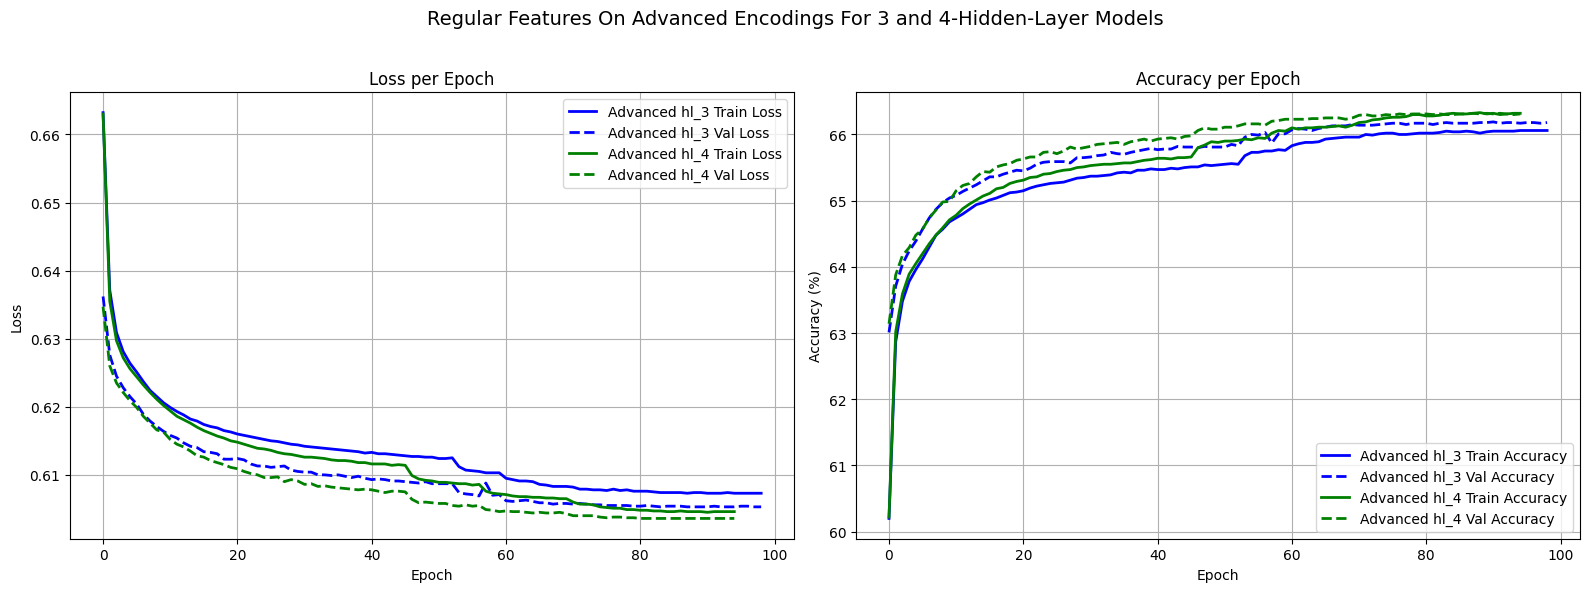

In [14]:
hl_4_train_losses_advanced_encodings, hl_4_train_accuracies_advanced_encodings, hl_4_val_losses_advanced_encodings, hl_4_val_accuracies_advanced_encodings = extract_training_metrics("hl_4_advanced_encodings", hl_4_advanced_encodings_logs)

import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Loss on ax1
ax1.plot(hl_3_train_losses_advanced_encodings, label='Advanced hl_3 Train Loss', color='b', linestyle='-', linewidth=2)
ax1.plot(hl_3_val_losses_advanced_encodings, label='Advanced hl_3 Val Loss', color='b', linestyle='--', linewidth=2)

ax1.plot(hl_4_train_losses_advanced_encodings, label='Advanced hl_4 Train Loss', color='g', linestyle='-', linewidth=2)
ax1.plot(hl_4_val_losses_advanced_encodings, label='Advanced hl_4 Val Loss', color='g', linestyle='--', linewidth=2)

ax1.set_title('Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

# Plotting Accuracy on ax2
ax2.plot(hl_3_train_accuracies_advanced_encodings, label='Advanced hl_3 Train Accuracy', color='b', linestyle='-', linewidth=2)
ax2.plot(hl_3_val_accuracies_advanced_encodings, label='Advanced hl_3 Val Accuracy', color='b', linestyle='--', linewidth=2)

ax2.plot(hl_4_train_accuracies_advanced_encodings, label='Advanced hl_4 Train Accuracy', color='g', linestyle='-', linewidth=2)
ax2.plot(hl_4_val_accuracies_advanced_encodings, label='Advanced hl_4 Val Accuracy', color='g', linestyle='--', linewidth=2)

ax2.set_title('Accuracy per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.grid(True)
ax2.legend()

plt.suptitle('Regular Features On Advanced Encodings For 3 and 4-Hidden-Layer Models', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

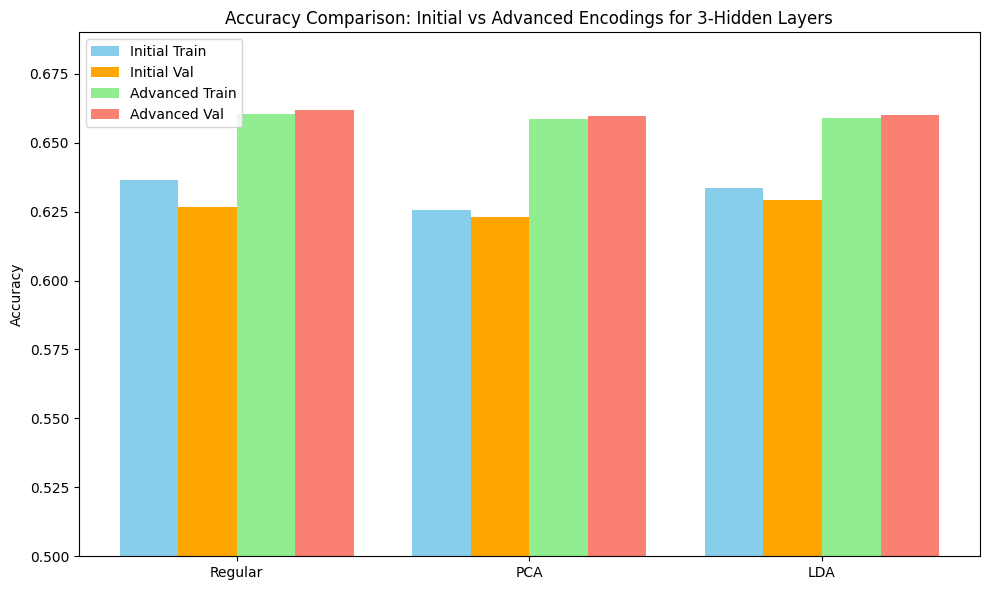

In [15]:
# Accuracy results

import numpy as np

initial_encodings = {
    # Epoch: 4
    "Regular": {"train": 0.6365, "val": 0.6267},
    # Epoch: 2
    "PCA": {"train": 0.6254, "val": 0.6230},
    # Epoch: 3
    "LDA": {"train": 0.6335, "val": 0.6292}
}

advanced_encodings_model = {
    # Epoch: 91
    "Regular": {"train": 0.6605, "val": 0.6619},
    # Epoch: 74
    "PCA": {"train": 0.6585, "val": 0.6598},
    # Epoch: 100
    "LDA": {"train": 0.6588, "val": 0.6602}
}

models = list(initial_encodings.keys())
x = np.arange(len(models))
width = 0.2  # smaller width since we're plotting 4 bars per group

# Gather accuracy values
init_train = [initial_encodings[m]["train"] for m in models]
init_val = [initial_encodings[m]["val"] for m in models]
adv_train = [advanced_encodings_model[m]["train"] for m in models]
adv_val = [advanced_encodings_model[m]["val"] for m in models]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, init_train, width, label='Initial Train', color='skyblue')
plt.bar(x - 0.5*width, init_val, width, label='Initial Val', color='orange')
plt.bar(x + 0.5*width, adv_train, width, label='Advanced Train', color='lightgreen')
plt.bar(x + 1.5*width, adv_val, width, label='Advanced Val', color='salmon')

plt.ylabel('Accuracy')
plt.ylim(0.5, 0.69)
plt.title('Accuracy Comparison: Initial vs Advanced Encodings for 3-Hidden Layers')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

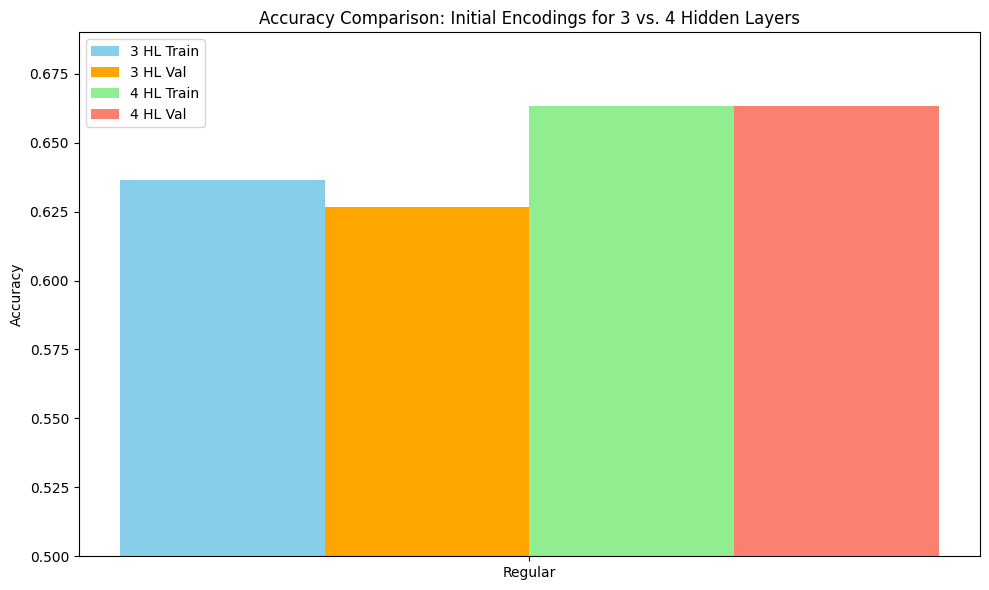

In [16]:
# Accuracy results

import numpy as np

hl_3 = {
    # Epoch: 4
    "Regular": {"train": 0.6365, "val": 0.6267},
}

hl_4 = {
    # Epoch: 88
    "Regular": {"train": 0.6632, "val": 0.6632},
}

models = list(hl_3.keys())
x = np.arange(len(models))
width = 0.5  # smaller width since we're plotting 1 bars per group

# Gather accuracy values
hl_3_train = [hl_3[m]["train"] for m in models]
hl_3_val = [hl_3[m]["val"] for m in models]
hl_4_train = [hl_4[m]["train"] for m in models]
hl_4_val = [hl_4[m]["val"] for m in models]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, hl_3_train, width, label='3 HL Train', color='skyblue')
plt.bar(x - 0.5*width, hl_3_val, width, label='3 HL Val', color='orange')
plt.bar(x + 0.5*width, hl_4_train, width, label='4 HL Train', color='lightgreen')
plt.bar(x + 1.5*width, hl_4_val, width, label='4 HL Val', color='salmon')

plt.ylabel('Accuracy')
plt.ylim(0.5, 0.69)
plt.title('Accuracy Comparison: Initial Encodings for 3 vs. 4 Hidden Layers')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
hl_2_adv_val = 65.67
hl_2_adv_train = 65.35
 
pca_hl_2_adv_val = 65.55
pca_hl_2_adv_train = 65.22
 
lda_hl_2_adv_val = 65.48
lda_hl_2_adv_train = 65.19
 
hl_2_init_val = 62.95
hl_2_init_train = 63.29
 
pca_hl_2_init_val = 62.20
pca_hl_2_init_train = 62.61
 
lda_hl_2_init_val = 62.94
lda_hl_2_init_train = 63.29

hl_3_init_val = 62.67
pca_hl_3_init_val = 62.30
lda_hl_3_init_val = 62.92

hl_3_adv_val = 66.19
pca_hl_3_adv_val = 65.98
lda_hl_3_adv_val = 66.02

hl_4_adv_val = 66.32

# Additional variables
Initial_encodings = {
    "Linear SVC": {"train": 0.5988, "val": 0.5909},
    "Logistic Regression": {"train": 0.5989, "val": 0.5909},
    "Perceptron": {"train": 0.5542, "val": 0.5434}
}
 
advanced_encodings_model = {
    "Linear SVC": {"train": 0.6002, "val": 0.5998},
    "Logistic Regression": {"train": 0.6003, "val": 0.5998},
    "Perceptron": {"train": 0.5369, "val": 0.5371}
}
 
xgb_initial_encodings_train_acc = 0.66876
xgb_initial_encodings_val_acc = 0.66171
 
xgb_advanced_encodings_train_acc = 0.67391
xgb_advanced_encodings_val_acc = 0.66830
 
lgboost_advanced_valingAccuracy = 0.6672

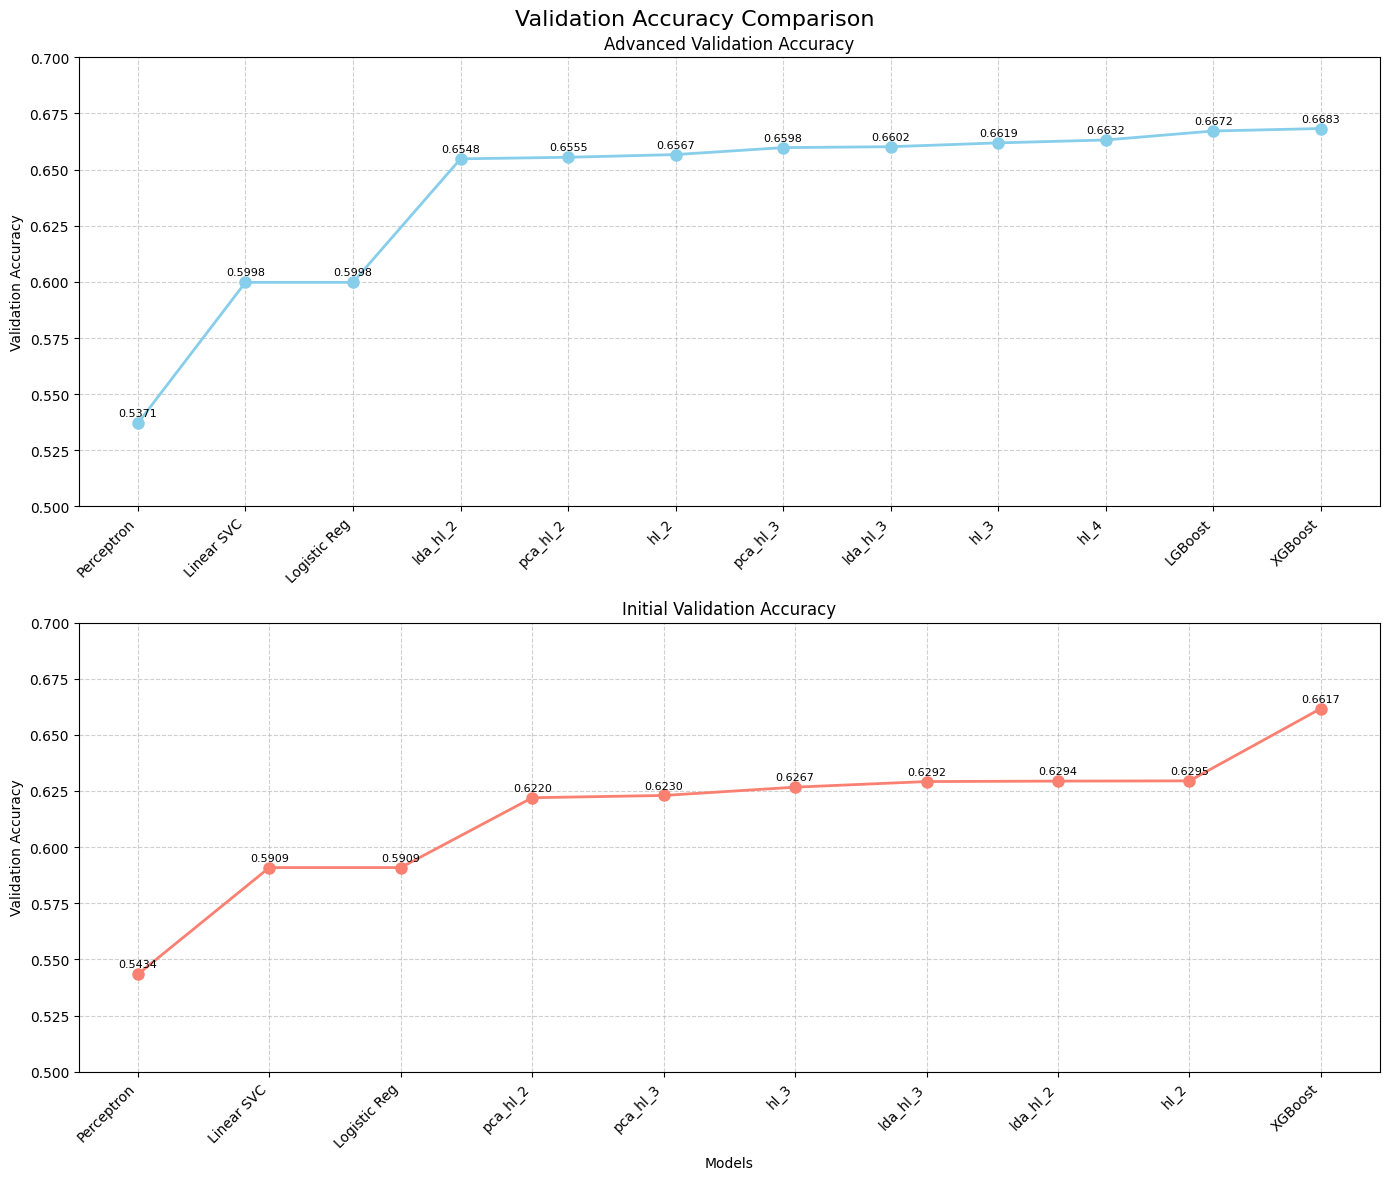

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Categories (all models)
categories = [
    'hl_2', 'pca_hl_2', 'lda_hl_2', 
    'hl_3', 'pca_hl_3', 'lda_hl_3', 
    'hl_4', 
    'Linear SVC', 'Logistic Reg', 'Perceptron',
    'XGBoost', 'LGBoost'
]

# Validation accuracies only (converted to 0-1 scale where needed)
advanced_val = [
    hl_2_adv_val / 100, pca_hl_2_adv_val / 100, lda_hl_2_adv_val / 100,
    hl_3_adv_val / 100, pca_hl_3_adv_val / 100, lda_hl_3_adv_val / 100,
    hl_4_adv_val / 100,
    advanced_encodings_model["Linear SVC"]["val"],
    advanced_encodings_model["Logistic Regression"]["val"],
    advanced_encodings_model["Perceptron"]["val"],
    xgb_advanced_encodings_val_acc,
    lgboost_advanced_valingAccuracy
]

initial_val = [
    hl_2_init_val / 100, pca_hl_2_init_val / 100, lda_hl_2_init_val / 100,
    hl_3_init_val / 100, pca_hl_3_init_val / 100, lda_hl_3_init_val / 100,
    np.nan, # No hl_4_adv data
    Initial_encodings["Linear SVC"]["val"],
    Initial_encodings["Logistic Regression"]["val"],
    Initial_encodings["Perceptron"]["val"],
    xgb_initial_encodings_val_acc,
    np.nan  # No LGBoost initial encoding data
]

# Create data pairs for advanced validation accuracy
advanced_data = [(cat, acc) for cat, acc in zip(categories, advanced_val)]
# Sort by advanced validation accuracy
advanced_data.sort(key=lambda x: x[1])
# Extract sorted categories and values for advanced
advanced_sorted_categories = [x[0] for x in advanced_data]
advanced_sorted_val = [x[1] for x in advanced_data]

# Create data pairs for initial validation accuracy (excluding NaN values)
initial_data = [(cat, acc) for cat, acc in zip(categories, initial_val) if not np.isnan(acc)]
# Sort by initial validation accuracy
initial_data.sort(key=lambda x: x[1])
# Extract sorted categories and values for initial
initial_sorted_categories = [x[0] for x in initial_data]
initial_sorted_val = [x[1] for x in initial_data]

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
fig.suptitle('Validation Accuracy Comparison', fontsize=16, y=0.98)

# Plot for advanced validation accuracy (sorted)
ax1.plot(range(len(advanced_sorted_val)), advanced_sorted_val, 'o-', linewidth=2, markersize=8, 
        color='skyblue')
ax1.set_title('Advanced Validation Accuracy')
ax1.set_ylabel('Validation Accuracy')
ax1.set_xticks(range(len(advanced_sorted_categories)))
ax1.set_xticklabels(advanced_sorted_categories, rotation=45, ha='right')
ax1.set_ylim(0.5, 0.7)
ax1.grid(True, linestyle='--', alpha=0.6)

# Add value labels to advanced points
for i, val in enumerate(advanced_sorted_val):
    ax1.annotate(f'{val:.4f}', 
                xy=(i, val), 
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', 
                fontsize=8)

# Plot for initial validation accuracy (sorted)
ax2.plot(range(len(initial_sorted_val)), initial_sorted_val, 'o-', linewidth=2, markersize=8, 
        color='salmon')
ax2.set_title('Initial Validation Accuracy')
ax2.set_xlabel('Models')
ax2.set_ylabel('Validation Accuracy')
ax2.set_xticks(range(len(initial_sorted_categories)))
ax2.set_xticklabels(initial_sorted_categories, rotation=45, ha='right')
ax2.set_ylim(0.5, 0.7)
ax2.grid(True, linestyle='--', alpha=0.6)

# Add value labels to initial points
for i, val in enumerate(initial_sorted_val):
    ax2.annotate(f'{val:.4f}', 
                xy=(i, val), 
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', 
                fontsize=8)

plt.tight_layout()
plt.savefig('validation_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

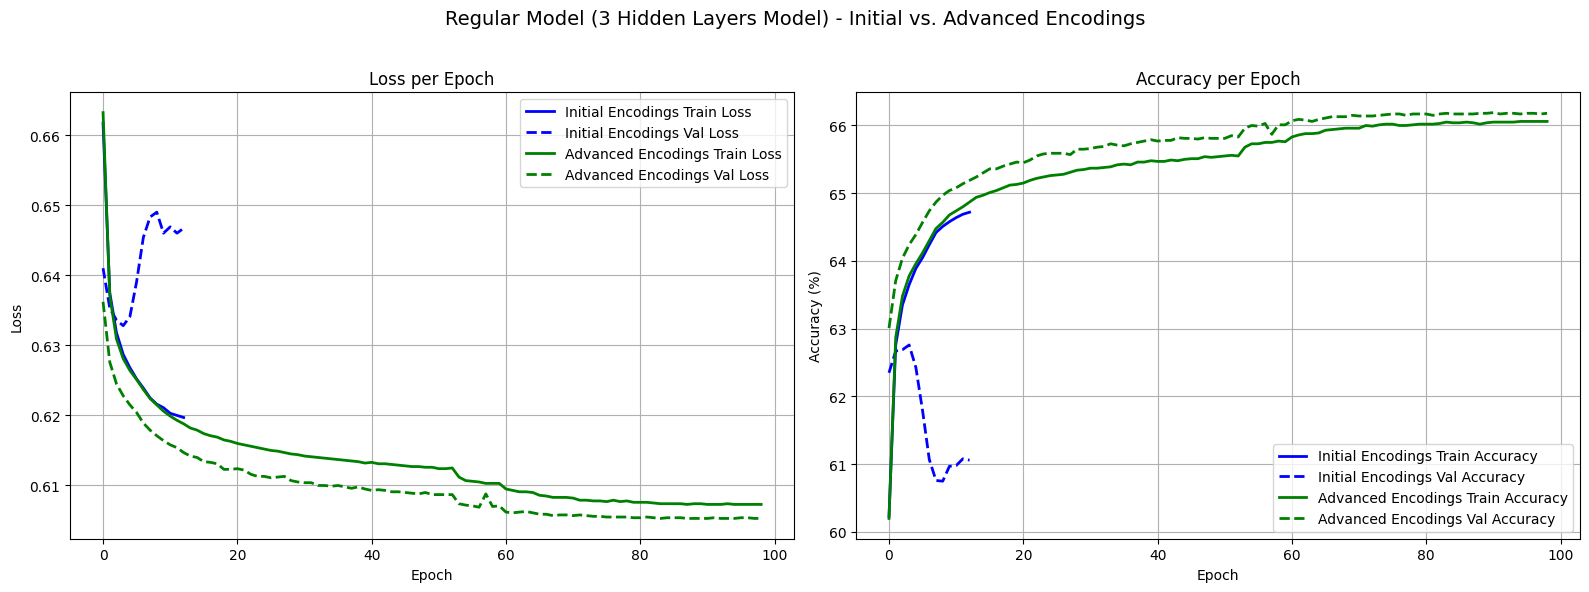

In [19]:
import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Loss on ax1
ax1.plot(hl_3_train_losses_initial_encodings, label='Initial Encodings Train Loss', color='b', linestyle='-', linewidth=2)
ax1.plot(hl_3_val_losses_initial_encodings, label='Initial Encodings Val Loss', color='b', linestyle='--', linewidth=2)

ax1.plot(hl_3_train_losses_advanced_encodings, label='Advanced Encodings Train Loss', color='g', linestyle='-', linewidth=2)
ax1.plot(hl_3_val_losses_advanced_encodings, label='Advanced Encodings Val Loss', color='g', linestyle='--', linewidth=2)

ax1.set_title('Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

# Plotting Accuracy on ax2
ax2.plot(hl_3_train_accuracies_initial_encodings, label='Initial Encodings Train Accuracy', color='b', linestyle='-', linewidth=2)
ax2.plot(hl_3_val_accuracies_initial_encodings, label='Initial Encodings Val Accuracy', color='b', linestyle='--', linewidth=2)

ax2.plot(hl_3_train_accuracies_advanced_encodings, label='Advanced Encodings Train Accuracy', color='g', linestyle='-', linewidth=2)
ax2.plot(hl_3_val_accuracies_advanced_encodings, label='Advanced Encodings Val Accuracy', color='g', linestyle='--', linewidth=2)

ax2.set_title('Accuracy per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.grid(True)
ax2.legend()

plt.suptitle('Regular Model (3 Hidden Layers Model) - Initial vs. Advanced Encodings', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


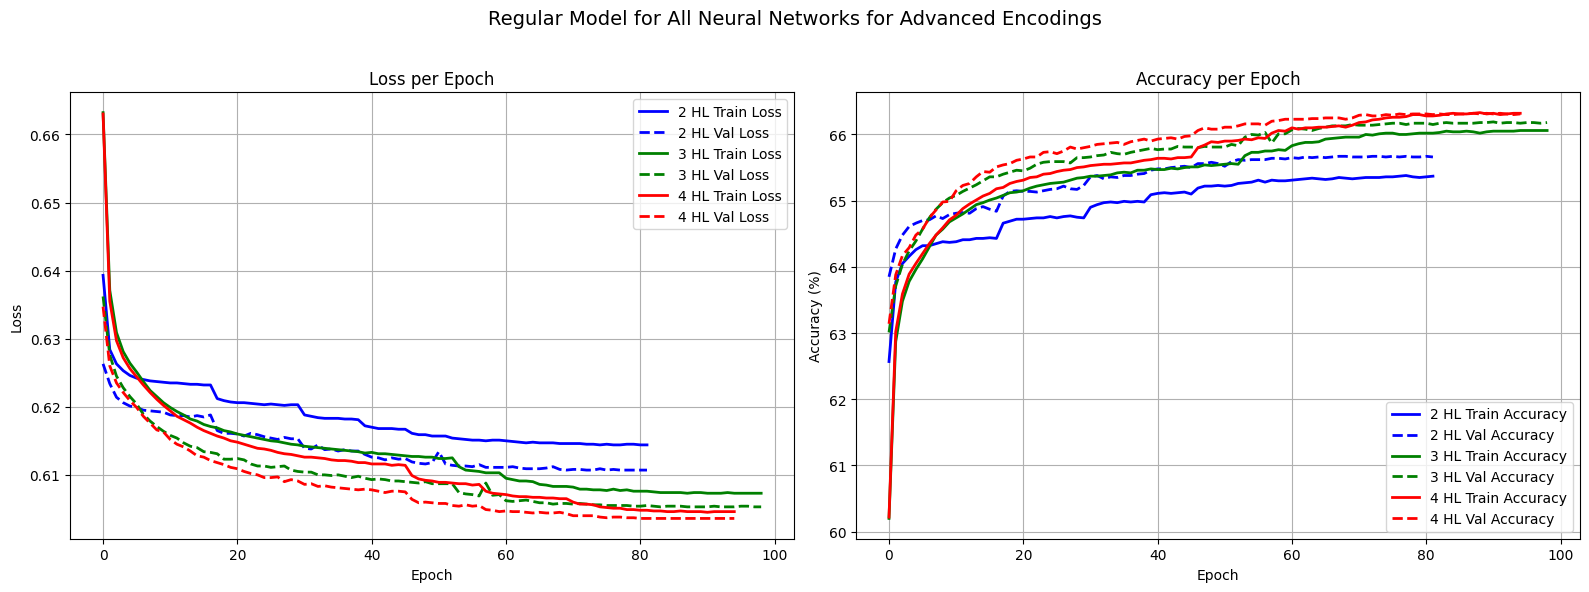

In [20]:
import matplotlib.pyplot as plt

hl_2_train_losses_advanced_encodings = [0.6393, 0.6284, 0.6263, 0.6253, 0.6246, 0.6242, 0.624, 0.6238, 0.6237, 0.6236, 0.6235, 0.6235, 0.6234, 0.6233, 0.6233, 0.6232, 0.6232, 0.6212, 0.6209, 0.6207, 0.6206, 0.6206, 0.6205, 0.6204, 0.6203, 0.6204, 0.6203, 0.6202, 0.6203, 0.6203, 0.6188, 0.6186, 0.6184, 0.6183, 0.6183, 0.6183, 0.6182, 0.6182, 0.6181, 0.6172, 0.617, 0.6168, 0.6168, 0.6168, 0.6167, 0.6167, 0.6161, 0.6159, 0.6159, 0.6157, 0.6157, 0.6157, 0.6154, 0.6153, 0.6152, 0.6151, 0.6151, 0.615, 0.6151, 0.6151, 0.615, 0.6149, 0.6148, 0.6147, 0.6148, 0.6147, 0.6147, 0.6147, 0.6146, 0.6146, 0.6146, 0.6146, 0.6145, 0.6145, 0.6144, 0.6145, 0.6144, 0.6144, 0.6145, 0.6145, 0.6144, 0.6144]
hl_2_train_accuracies_advanced_encodings = [62.57, 63.77, 64.05, 64.16, 64.26, 64.32, 64.32, 64.35, 64.38, 64.37, 64.38, 64.41, 64.41, 64.43, 64.43, 64.44, 64.43, 64.66, 64.69, 64.72, 64.72, 64.73, 64.74, 64.74, 64.76, 64.74, 64.76, 64.77, 64.75, 64.74, 64.9, 64.94, 64.97, 64.98, 64.97, 64.99, 64.98, 64.99, 64.98, 65.09, 65.11, 65.12, 65.11, 65.12, 65.13, 65.1, 65.19, 65.22, 65.22, 65.23, 65.22, 65.23, 65.26, 65.27, 65.28, 65.31, 65.28, 65.31, 65.3, 65.3, 65.31, 65.32, 65.33, 65.34, 65.33, 65.32, 65.33, 65.35, 65.34, 65.33, 65.34, 65.35, 65.35, 65.35, 65.36, 65.36, 65.37, 65.38, 65.36, 65.35, 65.36, 65.37]
hl_2_val_losses_advanced_encodings = [0.6263, 0.6234, 0.6214, 0.6206, 0.6201, 0.6199, 0.6195, 0.6194, 0.6193, 0.6192, 0.6188, 0.6187, 0.6187, 0.6185, 0.6187, 0.6185, 0.6188, 0.6165, 0.6161, 0.6161, 0.616, 0.6157, 0.6161, 0.6159, 0.6156, 0.6154, 0.6152, 0.6155, 0.6153, 0.6153, 0.6139, 0.6138, 0.6144, 0.6137, 0.6138, 0.6135, 0.6137, 0.6135, 0.6135, 0.613, 0.6126, 0.6125, 0.6122, 0.6125, 0.6123, 0.6124, 0.6119, 0.6117, 0.6116, 0.6118, 0.6134, 0.6116, 0.6114, 0.6113, 0.6113, 0.6112, 0.6115, 0.6111, 0.6111, 0.6111, 0.6111, 0.6112, 0.611, 0.6109, 0.6109, 0.6109, 0.611, 0.6112, 0.6108, 0.6107, 0.6108, 0.6108, 0.6107, 0.6107, 0.6109, 0.6107, 0.6108, 0.6107, 0.6107, 0.6107, 0.6107, 0.6107]
hl_2_val_accuracies_advanced_encodings = [63.85, 64.27, 64.48, 64.61, 64.66, 64.7, 64.71, 64.77, 64.73, 64.79, 64.81, 64.82, 64.81, 64.88, 64.91, 64.87, 64.84, 65.07, 65.14, 65.15, 65.14, 65.14, 65.13, 65.15, 65.17, 65.18, 65.22, 65.18, 65.17, 65.23, 65.36, 65.38, 65.33, 65.36, 65.35, 65.38, 65.38, 65.4, 65.41, 65.46, 65.48, 65.48, 65.5, 65.51, 65.52, 65.5, 65.56, 65.56, 65.58, 65.56, 65.52, 65.59, 65.62, 65.61, 65.62, 65.62, 65.62, 65.64, 65.64, 65.63, 65.65, 65.64, 65.66, 65.65, 65.66, 65.65, 65.66, 65.67, 65.67, 65.66, 65.66, 65.66, 65.67, 65.67, 65.66, 65.67, 65.66, 65.67, 65.66, 65.66, 65.67, 65.66]

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Loss on ax1
ax1.plot(hl_2_train_losses_advanced_encodings, label='2 HL Train Loss', color='b', linestyle='-', linewidth=2)
ax1.plot(hl_2_val_losses_advanced_encodings, label='2 HL Val Loss', color='b', linestyle='--', linewidth=2)

ax1.plot(hl_3_train_losses_advanced_encodings, label='3 HL Train Loss', color='g', linestyle='-', linewidth=2)
ax1.plot(hl_3_val_losses_advanced_encodings, label='3 HL Val Loss', color='g', linestyle='--', linewidth=2)

ax1.plot(hl_4_train_losses_advanced_encodings, label='4 HL Train Loss', color='r', linestyle='-', linewidth=2)
ax1.plot(hl_4_val_losses_advanced_encodings, label='4 HL Val Loss', color='r', linestyle='--', linewidth=2)

ax1.set_title('Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

# Plotting Accuracy on ax2
ax2.plot(hl_2_train_accuracies_advanced_encodings, label='2 HL Train Accuracy', color='b', linestyle='-', linewidth=2)
ax2.plot(hl_2_val_accuracies_advanced_encodings, label='2 HL Val Accuracy', color='b', linestyle='--', linewidth=2)

ax2.plot(hl_3_train_accuracies_advanced_encodings, label='3 HL Train Accuracy', color='g', linestyle='-', linewidth=2)
ax2.plot(hl_3_val_accuracies_advanced_encodings, label='3 HL Val Accuracy', color='g', linestyle='--', linewidth=2)

ax2.plot(hl_4_train_accuracies_advanced_encodings, label='4 HL Train Accuracy', color='r', linestyle='-', linewidth=2)
ax2.plot(hl_4_val_accuracies_advanced_encodings, label='4 HL Val Accuracy', color='r', linestyle='--', linewidth=2)

ax2.set_title('Accuracy per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.grid(True)
ax2.legend()

plt.suptitle('Regular Model for All Neural Networks for Advanced Encodings', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [21]:
hl_2_initial_encodings_submission = {"private_score": 0.48989, "public_score": 0.51461}
hl_2_initial_encodings_pca_submission = {"private_score": 0.47417, "public_score": 0.51026}
hl_2_initial_encodings_lda_submission = {"private_score": 0.49827, "public_score": 0.50455}
hl_3_initial_encodings_submission = {"private_score": 0.48119, "public_score": 0.52117}
hl_3_initial_encodings_pca_submission = {"private_score": 0.47203, "public_score": 0.51492}
hl_3_initial_encodings_lda_submission = {"private_score": 0.47459, "public_score": 0.51440}


hl_2_advanced_encodings_submission = {"private_score": 0.57931, "public_score": 0.62025}
hl_2_advanced_encodings_pca_submission = {"private_score": 0.58619, "public_score": 0.60710}
hl_2_advanced_encodings_lda_submission = {"private_score": 0.57834, "public_score": 0.61447}
hl_3_advanced_encodings_submission = {"private_score": 0.58870, "public_score": 0.62150}
hl_3_advanced_encodings_pca_submission = {"private_score": 0.60695, "public_score": 0.63683}
hl_3_advanced_encodings_lda_submission = {"private_score": 0.58079, "public_score": 0.62086}
hl_4_advanced_encodings_submission = {"private_score": 0.59512, "public_score": 0.62615}

xgboost_initial_encodings_submission = {"private_score": 0.62506, "public_score": 0.59801}

xgboost_advanced_encodings_submission = {"private_score": 0.57709, "public_score": 0.59864}
lightgbm_advanced_encodings_submission = {"private_score": 0.55224, "public_score": 0.59439}

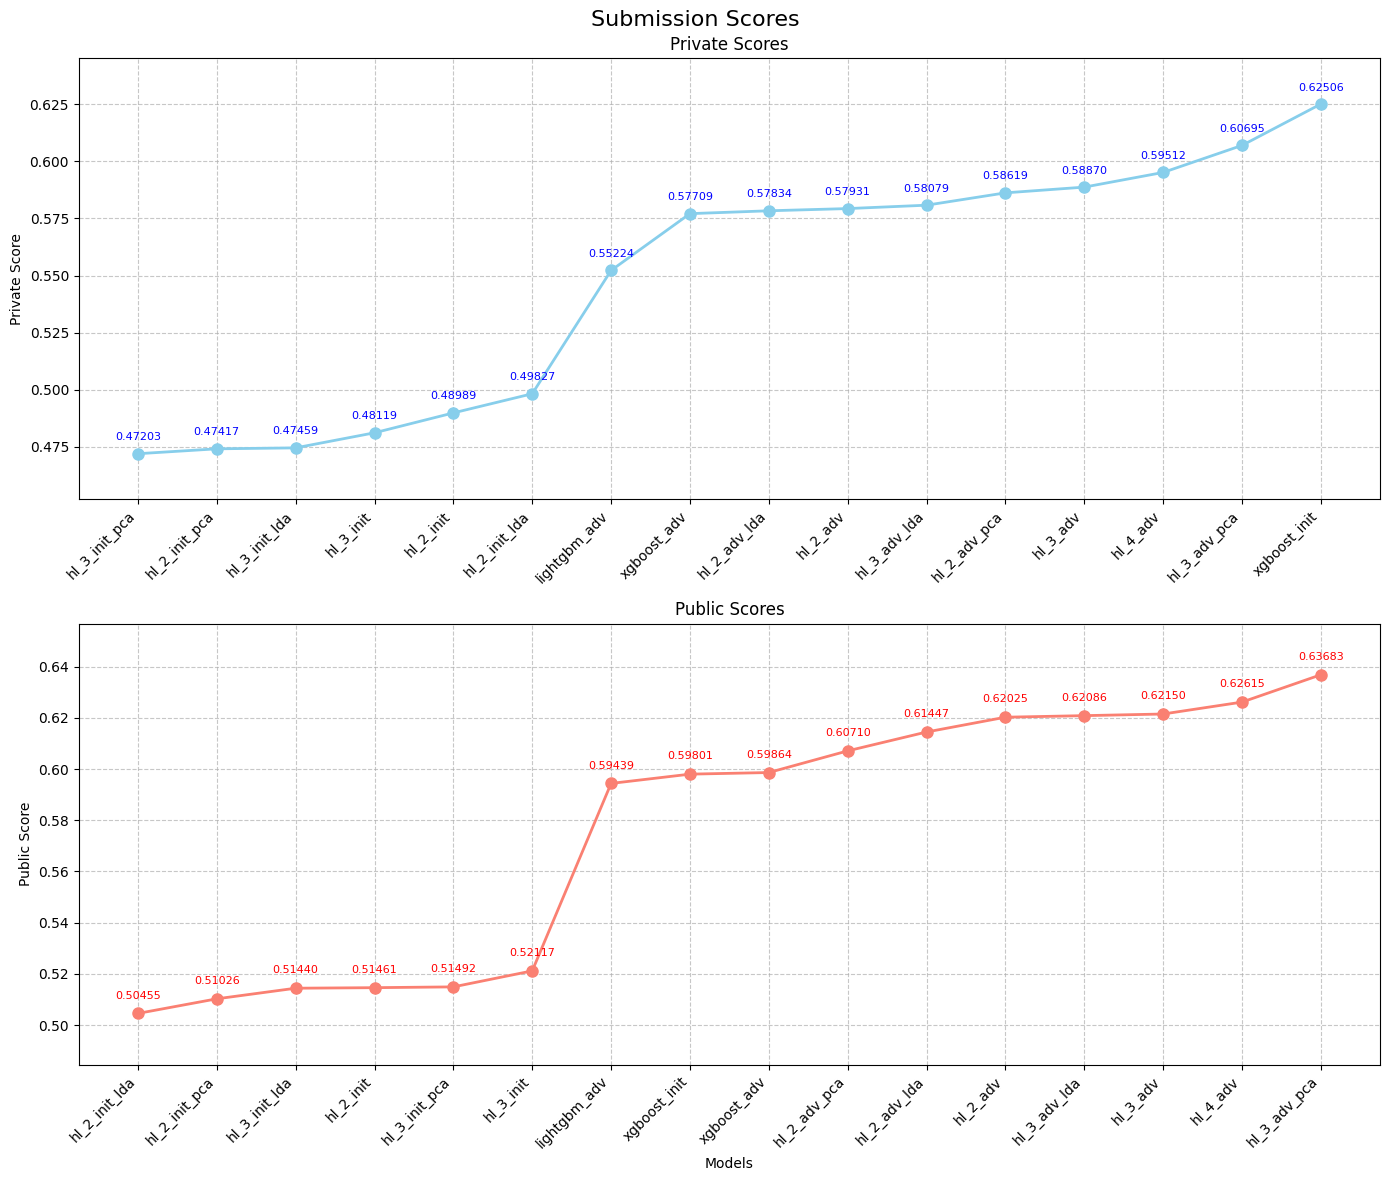

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data dictionary
data = {
    "hl_2_initial_encodings_submission": {"private_score": 0.48989, "public_score": 0.51461},
    "hl_2_initial_encodings_pca_submission": {"private_score": 0.47417, "public_score": 0.51026},
    "hl_2_initial_encodings_lda_submission": {"private_score": 0.49827, "public_score": 0.50455},
    "hl_3_initial_encodings_submission": {"private_score": 0.48119, "public_score": 0.52117},
    "hl_3_initial_encodings_pca_submission": {"private_score": 0.47203, "public_score": 0.51492},
    "hl_3_initial_encodings_lda_submission": {"private_score": 0.47459, "public_score": 0.51440},
    "hl_2_advanced_encodings_submission": {"private_score": 0.57931, "public_score": 0.62025},
    "hl_2_advanced_encodings_pca_submission": {"private_score": 0.58619, "public_score": 0.60710},
    "hl_2_advanced_encodings_lda_submission": {"private_score": 0.57834, "public_score": 0.61447},
    "hl_3_advanced_encodings_submission": {"private_score": 0.58870, "public_score": 0.62150},
    "hl_3_advanced_encodings_pca_submission": {"private_score": 0.60695, "public_score": 0.63683},
    "hl_3_advanced_encodings_lda_submission": {"private_score": 0.58079, "public_score": 0.62086},
    "hl_4_advanced_encodings_submission": {"private_score": 0.59512, "public_score": 0.62615},
    "xgboost_initial_encodings_submission": {"private_score": 0.62506, "public_score": 0.59801},
    "xgboost_advanced_encodings_submission": {"private_score": 0.57709, "public_score": 0.59864},
    "lightgbm_advanced_encodings_submission": {"private_score": 0.55224, "public_score": 0.59439}
}

# Create data arrays for easier sorting
private_data = []
public_data = []

for model, scores in data.items():
    private_data.append({
        'model': model,
        'score': scores['private_score']
    })
    
    public_data.append({
        'model': model,
        'score': scores['public_score']
    })

# Sort the data by score in ascending order
private_data.sort(key=lambda x: x['score'])
public_data.sort(key=lambda x: x['score'])

# Function to create shortened model names for better visualization
def shorten_model_name(name):
    return (name
            .replace('_submission', '')
            .replace('_encodings', '')
            .replace('initial', 'init')
            .replace('advanced', 'adv'))

# Create shortened model names and extract scores
private_models = [shorten_model_name(item['model']) for item in private_data]
private_scores = [item['score'] for item in private_data]

public_models = [shorten_model_name(item['model']) for item in public_data]
public_scores = [item['score'] for item in public_data]

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
fig.suptitle('Submission Scores', fontsize=16, y=0.98)

# Plot for private scores
ax1.plot(range(len(private_scores)), private_scores, marker='o', linestyle='-', 
         linewidth=2, markersize=8, color="skyblue")
ax1.set_title('Private Scores')
ax1.set_ylabel('Private Score')
ax1.set_xticks(range(len(private_models)))
ax1.set_xticklabels(private_models, rotation=45, ha='right')
ax1.grid(True, linestyle='--', alpha=0.7)

# Add values on top of points for private scores
for i, score in enumerate(private_scores):
    ax1.text(i, score + 0.005, f'{score:.5f}', ha='center', va='bottom', 
             fontsize=8, color='blue')

# Plot for public scores
ax2.plot(range(len(public_scores)), public_scores, marker='o', linestyle='-',
         linewidth=2, markersize=8, color="salmon")
ax2.set_title('Public Scores')
ax2.set_xlabel('Models')
ax2.set_ylabel('Public Score')
ax2.set_xticks(range(len(public_models)))
ax2.set_xticklabels(public_models, rotation=45, ha='right')
ax2.grid(True, linestyle='--', alpha=0.7)

# Add values on top of points for public scores
for i, score in enumerate(public_scores):
    ax2.text(i, score + 0.005, f'{score:.5f}', ha='center', va='bottom', 
             fontsize=8, color='red')

# Set appropriate y-axis limits for each plot
min_private = min(private_scores) - 0.02
max_private = max(private_scores) + 0.02
ax1.set_ylim(min_private, max_private)

min_public = min(public_scores) - 0.02
max_public = max(public_scores) + 0.02
ax2.set_ylim(min_public, max_public)

# Tight layout to ensure labels are visible
plt.tight_layout()

# Save the figure
plt.savefig("separated_submission_scores.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()